## Análise de Tipos Morfológicos 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Tabela completa -- Para comparações
SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')

#Nossa amostra final
amostra_430 = pd.read_csv('amostra_430.csv')

#Definindo colunas de interesse -- Apenas necessário na tabela completa
Colunas_interesse = SaloButa_S4G[['Name_1','Mod','Nc','Q','C','Fn','f1','mag1_1','f2','mu02','f3',
                                  'mag3','f4','mu04','f5','mag5',
                                  'mstar','dmean','type','t_1','incl','Dist','__T_','__F_']] 

#Tirando as linhas duplicadas -- uma linha para cada componente do modelo
s4g_comps = Colunas_interesse.drop(index=0) #Removendo a primeira linha, que é apenas um indice que eu uso para me
#orientar com as colunas na tabela completa, pois são muitas colunas
s4g_2277 = s4g_comps.drop_duplicates(subset='Name_1')

#Tirando os NaNs das colunas que precisamos ter valores
s4g_nonan = s4g_2277.dropna(subset = ['mstar','incl','__T_']) #Ainda não retiramos os NaNs de F 
s4g_nonan

/tmp/ipykernel_93873/98807860.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  SaloButa_S4G = pd.read_csv('Salo15(4629)+IRSA_S4G(2352)+Bouquin18(1931)+Buta15.csv')


Name_1     Mod  Nc  Q  C        Fn     f1  mag1_1     f2    mu02  \
1     ESO011-005     _bz   2  4  B    sersic  0.571  14.822    NaN     NaN   
3     ESO012-010   _dbar   2  5  D   expdisk    NaN     NaN    NaN     NaN   
7     ESO013-016  _dbarf   2  5  D   expdisk    NaN     NaN    NaN     NaN   
9     ESO015-001   _dbar   2  5  D   expdisk    NaN     NaN    NaN     NaN   
11    ESO026-001  _ndbar   3  5  D   expdisk    NaN     NaN    NaN     NaN   
...          ...     ...  .. .. ..       ...    ...     ...    ...     ...   
4619    UGC12732   _dbar   2  5  D   expdisk    NaN     NaN    NaN     NaN   
4621    UGC12791      _d   1  5  D   expdisk    NaN     NaN    NaN     NaN   
4622    UGC12846      _d   1  5  D   expdisk    NaN     NaN    NaN     NaN   
4625    UGC12857    _zzn   3  4  Z  edgedisk    NaN     NaN  0.382  21.326   
4628    UGC12893     _bd   2  5  B    sersic  0.021  17.826    NaN     NaN   

      ...  f5  mag5   mstar   dmean  type  t_1   incl  Dist  __T_  __F_  
1     ... NaN   NaN   9.749  51.680   SBc  5.9  83.91   NaN   7.5  0.50  
3     ... NaN   NaN   9.632  32.750   SBd  7.7  26.82   NaN   7.0  0.75  
7     ... NaN   NaN   9.564  23.017   SBd  7.5  56.71  23.0   6.0  1.00  
9     ... NaN   NaN   8.806  19.950    IB  9.8  90.00   NaN  10.0  1.00  
11    ... NaN   NaN   9.373  19.160   SBc  5.9  30.39  19.2   5.5  0.62  
...   ...  ..   ...     ...     ...   ...  ...    ...   ...   ...   ...  
4619  ... NaN   NaN   8.703  12.400  SABm  8.7  26.57  12.4   8.0  0.50  
4621  ... NaN   NaN   8.190  12.900     I  9.9  90.00  12.9  10.0  1.00  
4622  ... NaN   NaN   8.687  24.100  SABm  8.7  25.66  24.1   9.0  0.38  
4625  ... NaN   NaN  10.005  36.717   Sbc  4.0  90.00  36.7   3.0  1.00  
4628  ... NaN   NaN   8.991     NaN    Sd  8.4  29.49   NaN  11.0  0.00  

[2206 rows x 24 columns]

(array([395.,  66., 114.,  85.,   0., 303.,  59., 194.,  54., 585.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

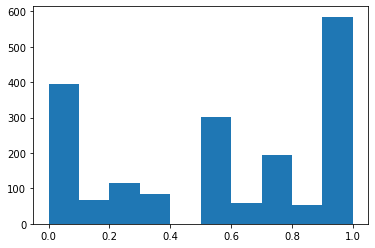

In [3]:
plt.hist(s4g_nonan['__F_']) #Histograma da classificação F em 2206 galáxias

In [4]:
def semF(tabela): #Função para verificar os tipos morfologicos das galáxias que não receberam valor em F
    
    #Olhando para galáxias sem classificação F
    new_s4g_nonan = tabela.reset_index()
    list_Tgal_semF = []
    incl = []
    for i in range(len(new_s4g_nonan['__F_'])):
        if np.isnan(float(new_s4g_nonan['__F_'][i])):
            list_Tgal_semF.append(float(new_s4g_nonan['__T_'][i]))
            incl.append(float(new_s4g_nonan['incl'][i]))
    #Vamos verificar os tipos morfológicos das galáxias que receberam NaN na classficação de família, mas possuem um valor em T
    plt.hist(list_Tgal_semF)
    plt.title('Amostra com %i galáxias' %len(list_Tgal_semF))
    plt.show()
    
    plt.hist(incl)
    plt.title('Inclinação')

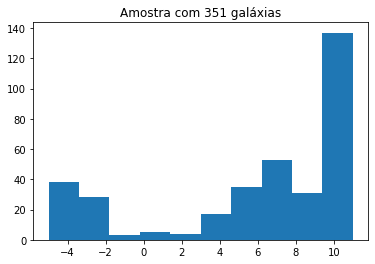

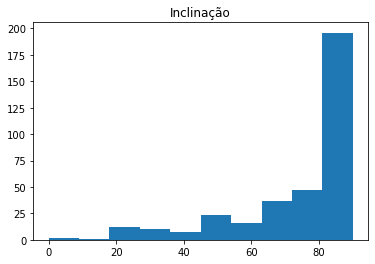

In [5]:
#Amostra total
semF(s4g_nonan)

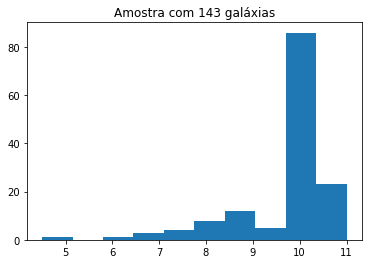

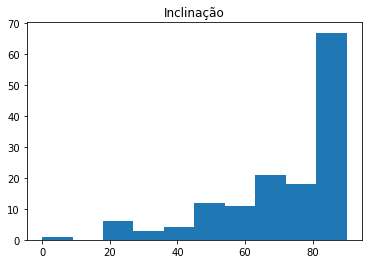

In [6]:
#Anãs
semF(s4g_nonan[s4g_nonan.mstar < 9])

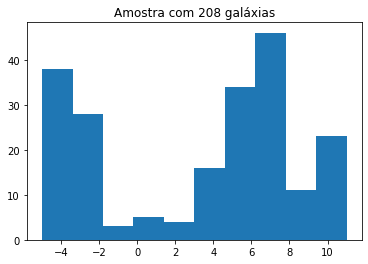

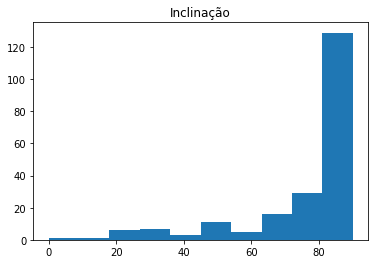

In [7]:
#Massivas
semF(s4g_nonan[s4g_nonan.mstar >= 9])

/tmp/ipykernel_93873/1659236353.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  semF(s4g_nonan[s4g_nonan.mstar >= 9][s4g_nonan.mstar < 10])


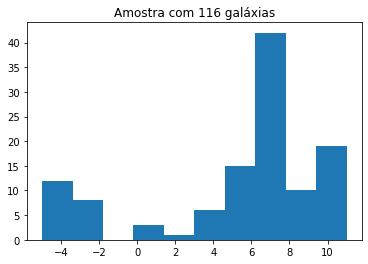

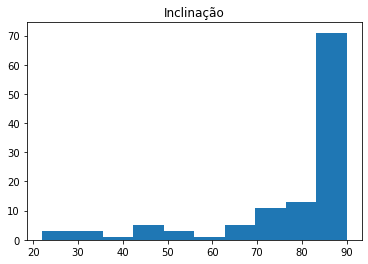

In [8]:
#Massivas intermediárias
semF(s4g_nonan[s4g_nonan.mstar >= 9][s4g_nonan.mstar < 10])

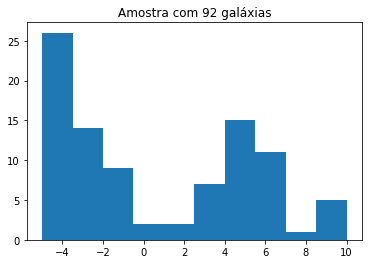

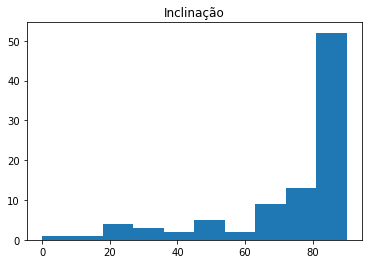

In [9]:
#Muito massivas
semF(s4g_nonan[s4g_nonan.mstar >= 10])

In [10]:
s4g_nonan = s4g_nonan.fillna(value = {'__F_': 0}) #Quando não tiver classificação em F (ou seja, nan) recebe valor 0

(array([746.,  66., 114.,  85.,   0., 303.,  59., 194.,  54., 585.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

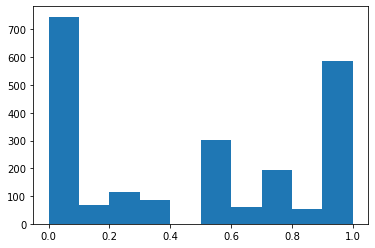

In [11]:
plt.hist(s4g_nonan['__F_'])

In [12]:
#Erro para a mediana
#Já que o desvio padrão é calculado a partir da média, a melhor forma de expressar a barra de erro seria: 

def erro_mediana(mean,std,median):
    
    dif = mean - median 
    err_median_pos = std + dif
    err_median_neg = (-std) + dif
    
    return median, '^+ ', err_median_pos, '_-', err_median_neg

In [13]:
def bar_in_T(tabela, T_ini, T_fin, mstar_ini, mstar_fin='No',plot=False, saveplot=False):
    '''
    Essa função lê um dataframe que precisa possuir as colunas T (classificação do estágio em que a galáxia se encontra, varia
    de -4 (Espiral) à 11 (Irregular)) e F (família, indica ou não presença de barra, varia de 0.0 à 1.0 onde 0.5 indica barra).
    
    Mais informações sobre as classficações de Buta15: 
    https://vizier.cds.unistra.fr/viz-bin/VizieR?-6N&-out.form=H0&//*&-5N&<"Label"&catid%3D22170032&tabid%3D1&colid%3D11
    
    Input:
    buta_barinT(tabela, T_ini, T_fin, mstar_ini, mstar_fin='No',plot=False,saveplot=False):
    
    Output:
    texto explicativo sobre a amostra escolhida e presença de barra na amostra.
    '''
    
    #Separando a amostra dentro de T e a amostra barrada
    amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]
    amostra_barradas_buta = amostra_buta[amostra_buta['__F_'] >= 0.50]
    
    #Adicionando o critério de inclinação -- obs: fiquei com preguiça de mudar o nome aqui, mas não sao necessariamente 
    #espirais já que voce pode escolher o T inicial e final na entrada da função
    espirais_buta_i65 = amostra_buta[amostra_buta.incl<65]
    espirais_barradas_buta_i65 = amostra_barradas_buta[amostra_barradas_buta.incl<65]

    #Adicionando critério de massa
    if mstar_fin != 'No':
        amostra_buta_mass = espirais_buta_i65[espirais_buta_i65['mstar'] >= mstar_ini][espirais_buta_i65['mstar'] < mstar_fin]
        amostra_barradas_buta_mass = espirais_barradas_buta_i65[espirais_barradas_buta_i65['mstar'] >=mstar_ini][espirais_barradas_buta_i65['mstar'] < mstar_fin]
    else:
        amostra_buta_mass = espirais_buta_i65[espirais_buta_i65['mstar'] >= mstar_ini]
        amostra_barradas_buta_mass = espirais_barradas_buta_i65[espirais_barradas_buta_i65['mstar'] >=mstar_ini]

    print('Então temos que de um total de %i galáxias\n' %len(tabela))
    print('%i estão dentro do critério T de: ' %len(amostra_buta), T_ini,'--',T_fin)
    print('\n%i possuem barras considerando o critério de T e F>=0.50\n' %len(amostra_barradas_buta))
    print('Com isso, vemos que considerando os critérios de Buta15, %.3f   das galáxias entre os T escolhidos são barradas' 
          %(len(amostra_barradas_buta)*100/len(amostra_buta)))
    
    print('\nOlhando para i<65, temos: ',len(espirais_buta_i65), 'galáxias\n')
    print('Onde, ', len(espirais_barradas_buta_i65), 'possuem barra, assim:  %.3f '
          %(len(espirais_barradas_buta_i65)*100/len(espirais_buta_i65)),'% das galaxias acima são barradas')
    
    print('\nOlhando para o corte de massa e considerando i<65, temos: ',len(amostra_buta_mass), 'galáxias\n')
    print('Onde, ', len(amostra_barradas_buta_mass), 'possuem barra, assim:  %.3f '
          %(len(amostra_barradas_buta_mass)*100/len(amostra_buta_mass)),'% das galaxias da amostra acima são barradas')
    
    print('\n\nInformações estatísticas da coluna de tipo morfológico da amostra com ',len(amostra_buta_mass),
          'galáxias, critério de massa, inclinação e tipo T:')
    print('\nMédia da amostra com corte de massa, tipo morfológico e inclinação: ', np.mean(amostra_buta_mass['__T_']),
              '\nMédia amostra com barras:', np.mean(amostra_barradas_buta_mass['__T_']) )
    print('Desvio padrão: ', np.std(amostra_buta_mass['__T_']), '\nDesvio padrão da amostra com barras: ', np.std(amostra_barradas_buta_mass['__T_']))
    print('Mediana: ', erro_mediana(mean=np.mean(amostra_buta_mass['__T_']),std=np.std(amostra_buta_mass['__T_']),median=np.median(amostra_buta_mass['__T_'])),
          '\nMediana da amostra com barras: ',erro_mediana(mean=np.mean(amostra_barradas_buta_mass['__T_']),std=np.std(amostra_barradas_buta_mass['__T_']),median=np.median(amostra_barradas_buta_mass['__T_'])) ,'\n\n')
    
    if plot:
        fig = plt.figure(figsize=(18,12))
        ax2 = fig.add_subplot(2,1,1)
        ax1 = fig.add_subplot(2,1,2)
        
        #Histograma da famílias -- galáxias com barra ou sem barra (apenas critério T)
        mask2 = amostra_buta['__F_'] >= 0.50 #mascara para olhar as barras
        ax1.hist(amostra_buta['__F_'][~mask2],bins=10, align='mid',color='c',alpha = 0.3, linestyle='-.',edgecolor='k', linewidth=1.8)
        ax1.hist(amostra_buta['__F_'][mask2],bins=10, align='mid',color='m',alpha = 0.3, linestyle=':',edgecolor='k', linewidth=1.8,label='F>=0.5')
        ax1.set_title('Analise da class F (apenas critério T)-- (NoBar ou SA)=0.0, SAB=0.5, SB=1.0',fontsize=16)
        ax1.set_ylabel('N',fontsize=14)
        ax1.set_xlabel('Classificação F -- Buta+15',fontsize=14)
        ax1.legend(loc='best',fontsize=14)
        
        #Comparativo tipo morfologico T vs Familias F (critério T)
        bins = (np.absolute(T_ini) + np.absolute(T_fin))
        if bins < 10:
                bins = (np.absolute(T_ini) + np.absolute(T_fin)) *2
            
        ax2.hist(amostra_buta['__T_'],bins=bins,alpha=0.3,color='k',linestyle='--',edgecolor='k', linewidth=1.3)
        ax2.set_ylabel('N',fontsize=14)
        ax2.set_xlabel('Tipo Morfológico T -- Buta+15',fontsize=14)
        ax2.set_title('Tipos T(Buta+15) -- Amostra com %i galáxias' %len(amostra_buta),fontsize=16)
        #ax2.legend(loc='best',fontsize=14)
        ax2.set_xticks(np.arange(T_ini,T_fin,1))
        
        ax1.tick_params(labelsize=14)
        ax2.tick_params(labelsize=14)
        
        if saveplot: #se True, salva a imagem
            image_name = 'Amostra_de_%i_galáxias_T.png' %len(amostra_buta)
            plt.savefig(image_name, format='png')
            plt.show()
        
        fig = plt.figure(figsize=(18,12))
        ax5 = fig.add_subplot(2,1,1)
        ax6 = fig.add_subplot(2,1,2)
        
        #Histograma da famílias -- galáxias com barra ou sem barra (critério T e inclinação menor que 65)
        mask3 = espirais_buta_i65['__F_'] >= 0.50 #mascara para olhar as barras
        ax5.hist(espirais_buta_i65['__F_'][~mask3],bins=10, align='mid',color='c',alpha = 0.3, linestyle='-.',edgecolor='k', linewidth=1.8)
        ax5.hist(espirais_buta_i65['__F_'][mask3],bins=10, align='mid',color='m',alpha = 0.3, linestyle=':',edgecolor='k', linewidth=1.8, label='F>=0.5')
        ax5.set_title('Analise da class F (critério T e incl < 65)-- (NoBar ou SA)=0.0, SAB=0.5, SB=1.0',fontsize=16)
        ax5.set_ylabel('N',fontsize=14)
        ax5.set_xlabel('Classificação F -- Buta+15',fontsize=14)
        ax5.legend(loc='best',fontsize=14)
        
        #Comparativo tipo morfologico T vs Familias F (critério T e inclinação)
        ax6.hist(espirais_buta_i65['__T_'][~mask3],bins=bins,alpha=0.3,color='c',linestyle='-',edgecolor='k', linewidth=1.3
                 ,label='nobar -- T,incl; %i galáxias' %len(espirais_buta_i65['__T_'][~mask3]))
        ax6.hist(espirais_buta_i65['__T_'][mask3],bins=bins,alpha=0.3,color='m',linestyle='--'
                 ,edgecolor='k', linewidth=1.3,label='bar -- T,incl; %i galáxias' %len(espirais_buta_i65['__T_'][mask3]))
        ax6.set_ylabel('N',fontsize=14)
        ax6.set_xlabel('Tipo Morfológico T -- Buta+15',fontsize=14)
        ax6.set_title('Tipos T(Buta+15) -- Amostra com %i galáxias (critério T e incl < 65)' %len(espirais_buta_i65['__T_']),fontsize=16)
        ax6.legend(loc='best',fontsize=14)
        ax6.set_xticks(np.arange(T_ini,T_fin,1))
        
        ax5.tick_params(labelsize=14)
        ax6.tick_params(labelsize=14)
        
        if saveplot: #se True, salva a imagem
            image_name = 'Amostra_de_%i_galáxias_T,Incl.png' %len(espirais_buta_i65['__T_'])
            plt.savefig(image_name, format='png')
            plt.show()
        
        #Critério T, mstar e inclinacao 65
        fig = plt.figure(figsize=(18,12))
        ax3 = fig.add_subplot(2,1,1)
        ax4 = fig.add_subplot(2,1,2)
           
        maskm2 = amostra_buta_mass['__F_'] >= 0.50 #mascara para olhar as barras
        ax3.hist(amostra_buta_mass['__T_'][~maskm2],bins=bins, align='mid',color='c',alpha = 0.3, linestyle='-.',edgecolor='k', linewidth=1.8
                 ,label='nobar -- T,mstar,incl; %i galáxias' %len(amostra_buta_mass[~maskm2])) #inverso da mascara -- olha para o que não tem barra
        ax3.hist(amostra_buta_mass['__T_'][maskm2],bins=bins, align='mid',color='m',alpha = 0.3, linestyle=':',edgecolor='k', linewidth=1.8
                 ,label='bar -- T,mstar,incl; %i galáxias' %len(amostra_buta_mass[maskm2]))#com mascara -- olha para o que tem barra
        ax3.set_ylabel('N',fontsize=14)
        ax3.set_xlabel('Tipo Morfológico T -- Buta+15',fontsize=14)
        ax3.set_title('Tipos T(Buta+15) -- Amostra com %i galáxias' %len(amostra_buta_mass),fontsize=16)
        ax3.legend(loc='best',fontsize=14)
        ax3.set_xticks(np.arange(T_ini,T_fin,1))

        #Histograma da famílias -- galáxias com barra ou sem barra (criterio massa, barra, inclinacao)
        ax4.hist(amostra_buta_mass['__F_'][~maskm2],bins=10, align='mid',color='c',alpha = 0.3, linestyle='-.',edgecolor='k', linewidth=1.8)
        ax4.hist(amostra_buta_mass['__F_'][maskm2],bins=10, align='mid',color='m',alpha = 0.3, linestyle=':',edgecolor='k', linewidth=1.8,label='F>=0.5')
        ax4.set_title('Analise da class F (critério T, incl, massa)-- (NoBar ou SA)=0.0, SAB=0.5, SB=1.0',fontsize=16)
        ax4.set_ylabel('N',fontsize=14)
        ax4.set_xlabel('Classificação F -- Buta+15',fontsize=14)
        ax4.legend(loc='best',fontsize=14)
          
        ax3.tick_params(labelsize=14)
        ax4.tick_params(labelsize=14)

        if saveplot: #se True, salva a imagem
            image_name = 'Amostra_de_%i_galáxias_T,Incl,Mass.png' %len(amostra_buta_mass['__F_'])
            plt.savefig(image_name, format='png')
            plt.show()

Então temos que de um total de 2206 galáxias

2206 estão dentro do critério T de:  -6 -- 12

1195 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 54.170   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  997 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.933600802407221 
Média amostra com barras: 5.349712092130519
Desvio padrão:  3.8449075822531253 
Desvio padrão da amostra com barras:  3.4159000625964553
Mediana:  (5.0, '^+ ', 3.778508384660346, '_-', -3.9113067798459045) 
Mediana da amostra com barras: 

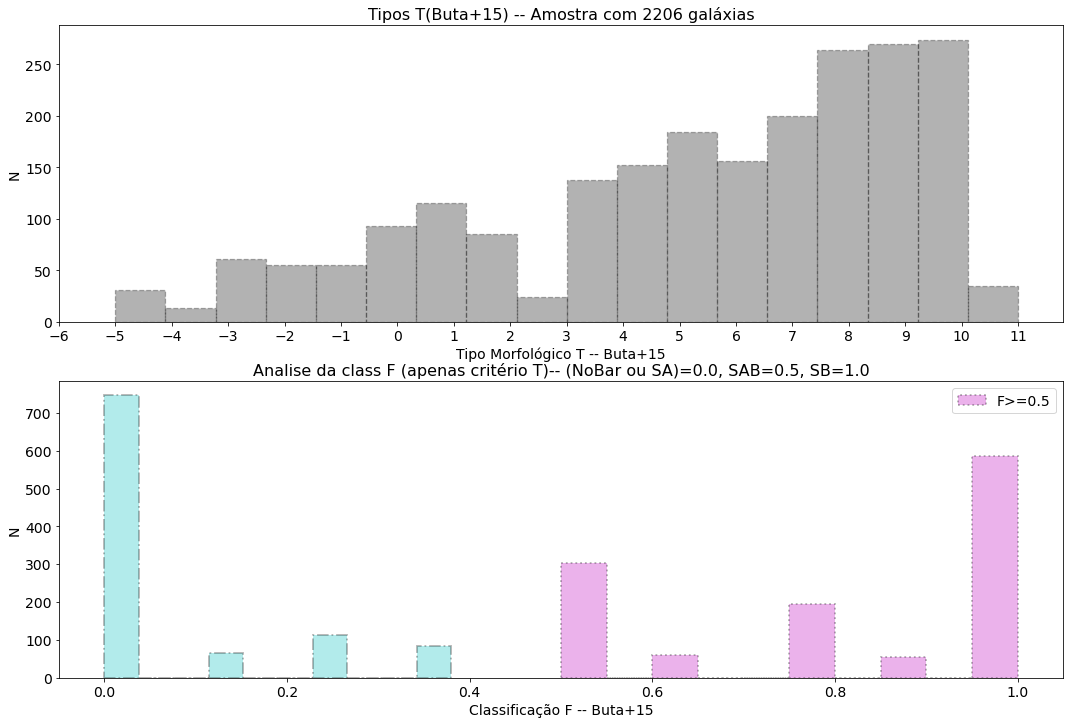

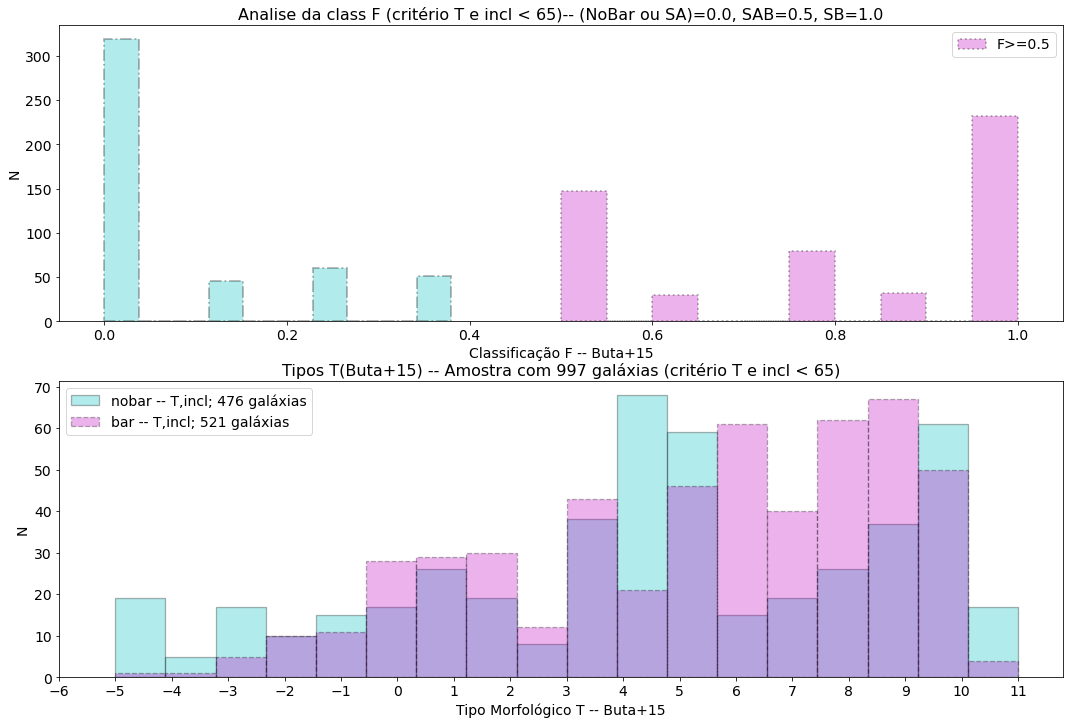

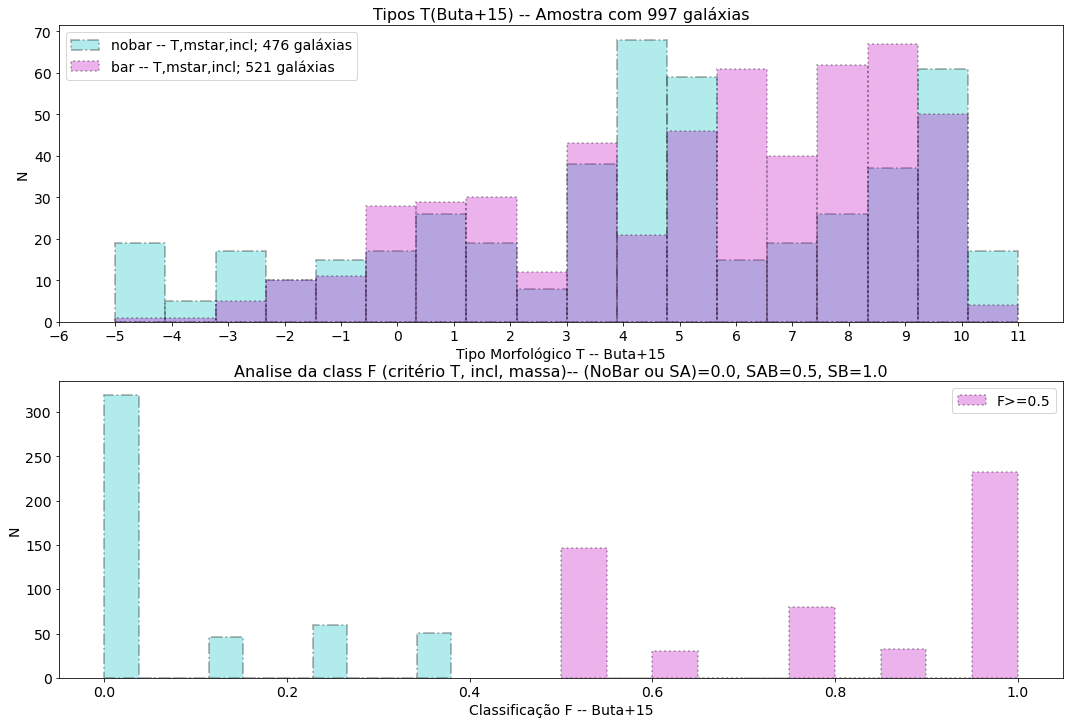

In [14]:
bar_in_T(s4g_nonan, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin=13,plot=True, saveplot=True)

#### Cortes de massa -- Todos tipos

Então temos que de um total de 2206 galáxias

2206 estão dentro do critério T de:  -6 -- 12

1195 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 54.170   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  131 galáxias

Onde,  50 possuem barra, assim:  38.168  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  131 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  9.0 
Média amostra com barras: 9.07
Desvio padrão:  2.2850326137281995 
Desvio padrão da amostra com barras:  1.6124825580452031
Mediana:  (9.5, '^+ ', 1.7850326137281995, '_-', -2.7850326137281995) 
Mediana da amostra com barras:  (9.5, '^+ ', 1.18248255804

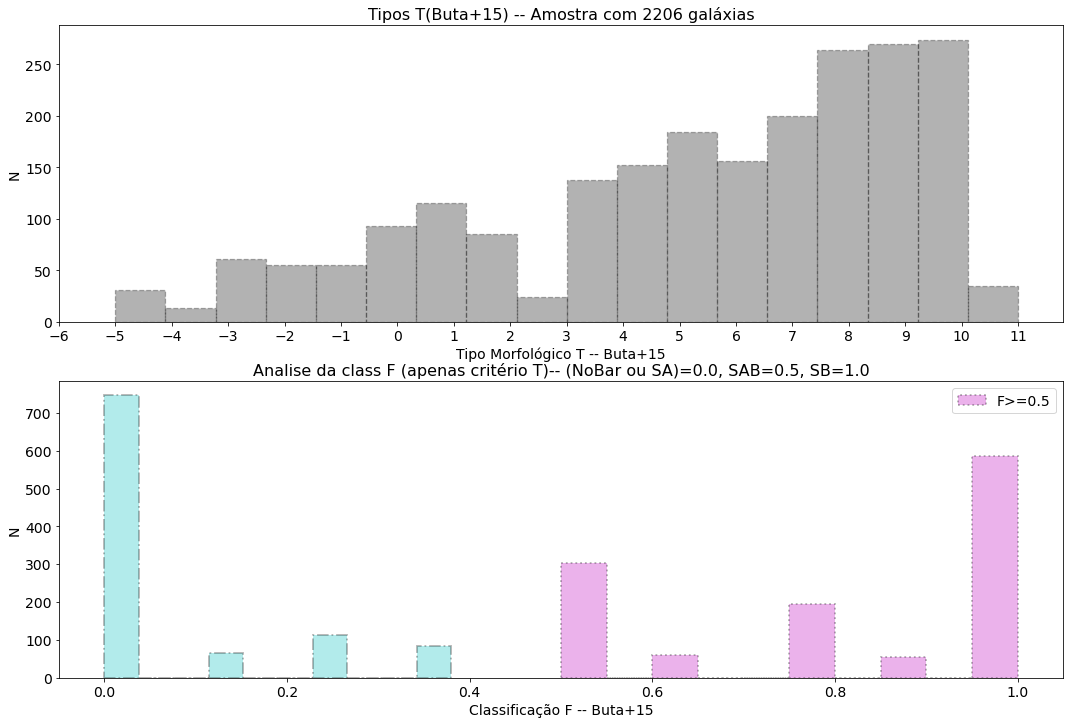

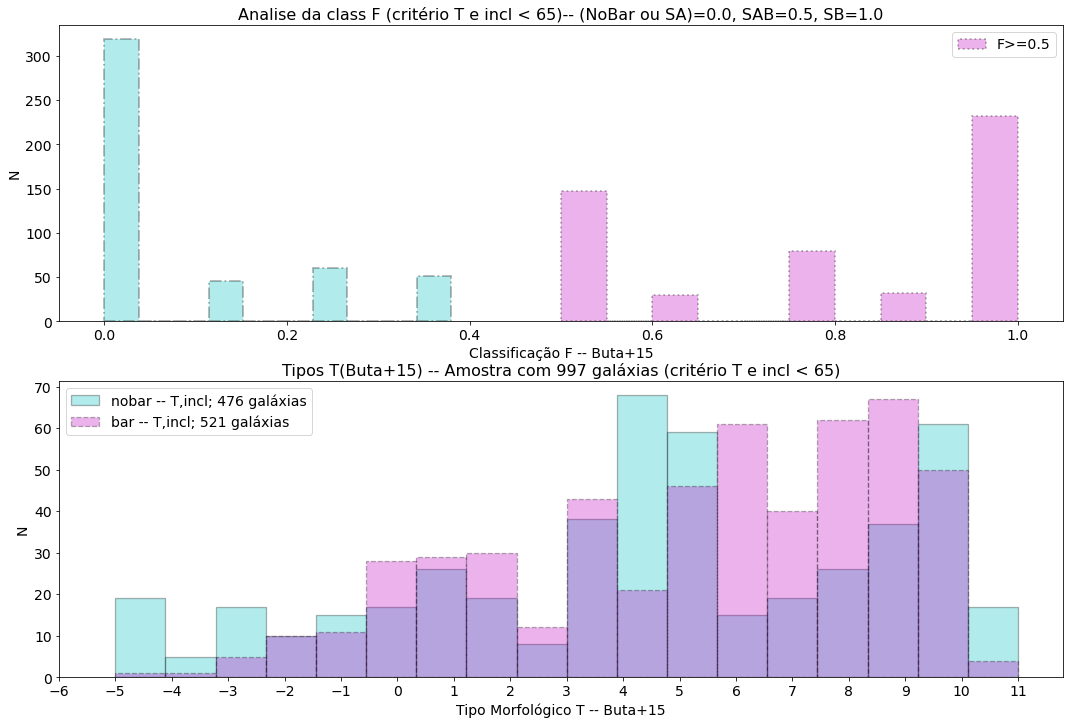

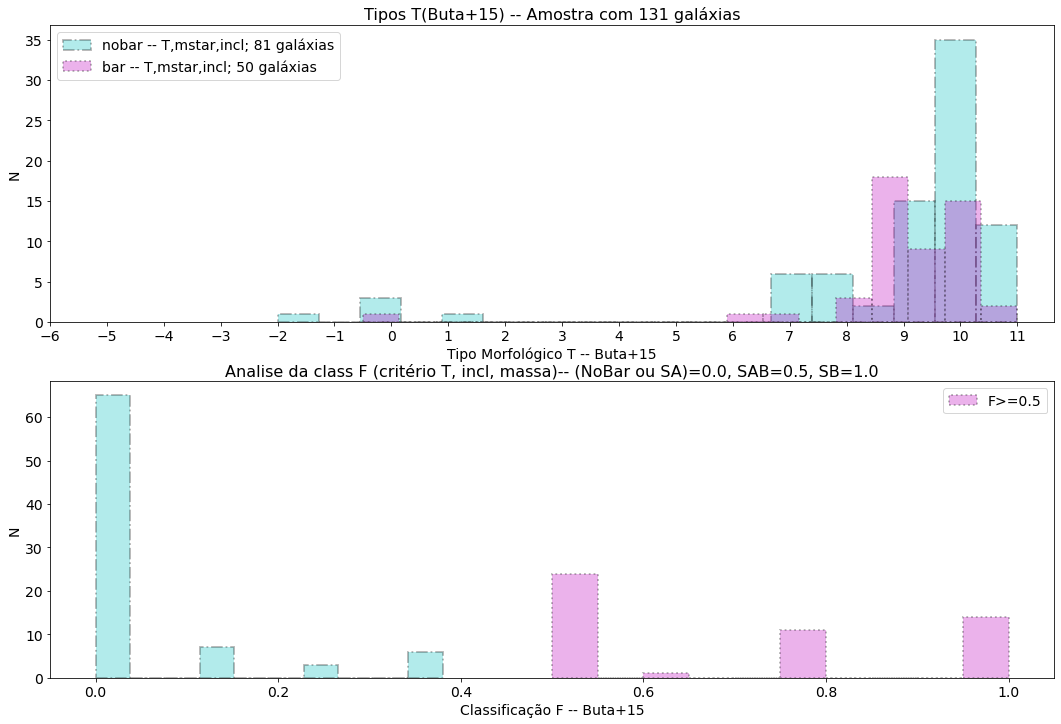

In [15]:
#corte de galáxias anãs
bar_in_T(s4g_nonan, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin=9,plot=True, saveplot=True)

Então temos que de um total de 2206 galáxias

2206 estão dentro do critério T de:  -6 -- 12

1195 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 54.170   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  866 galáxias

Onde,  471 possuem barra, assim:  54.388  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  866 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.318475750577367 
Média amostra com barras: 4.954777070063695
Desvio padrão:  3.653769035072164 
Desvio padrão da amostra com barras:  3.31749744257813
Mediana:  (5.0, '^+ ', 2.9722447856495307, '_-', -4.335293284494798) 
Mediana da amostra com barras:  (5

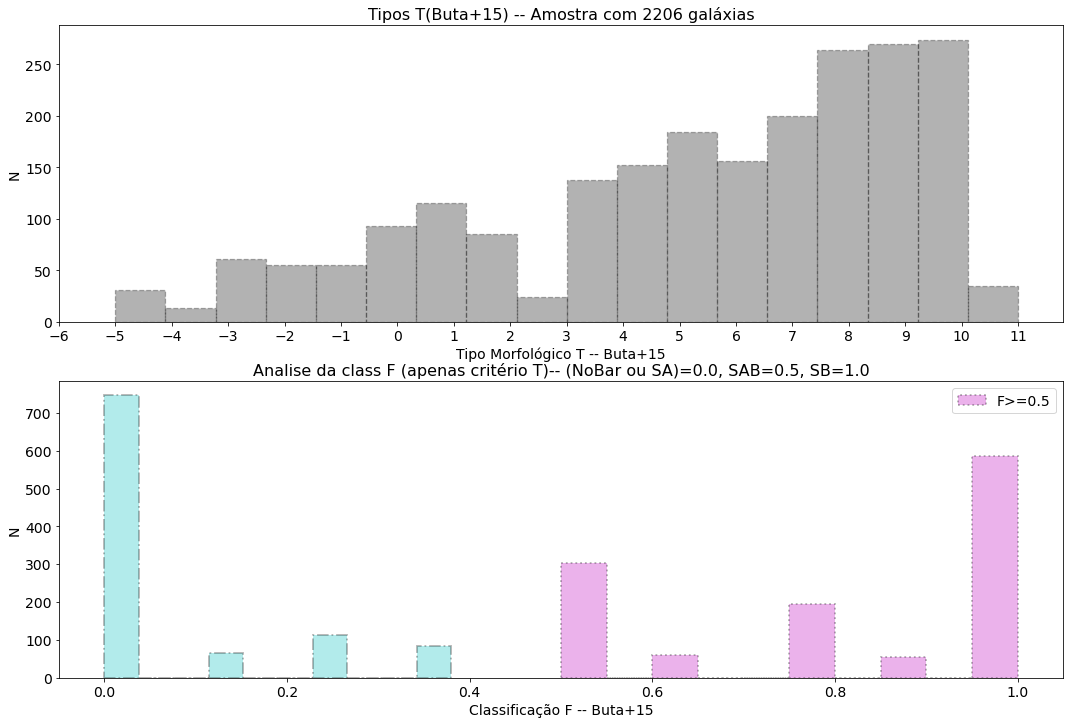

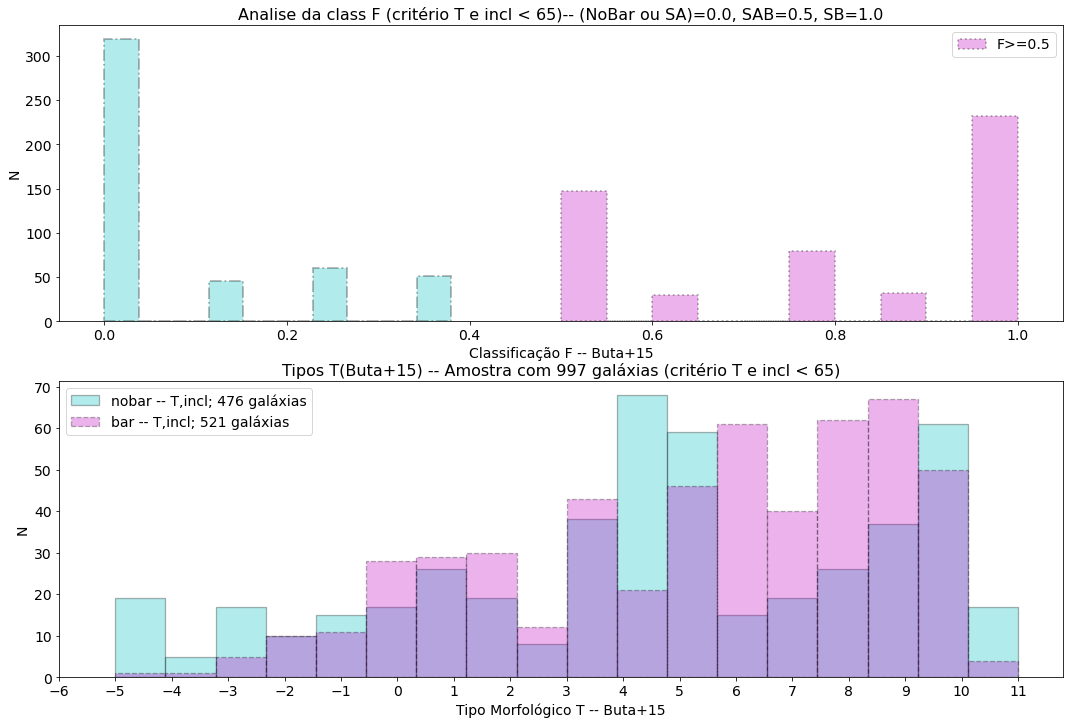

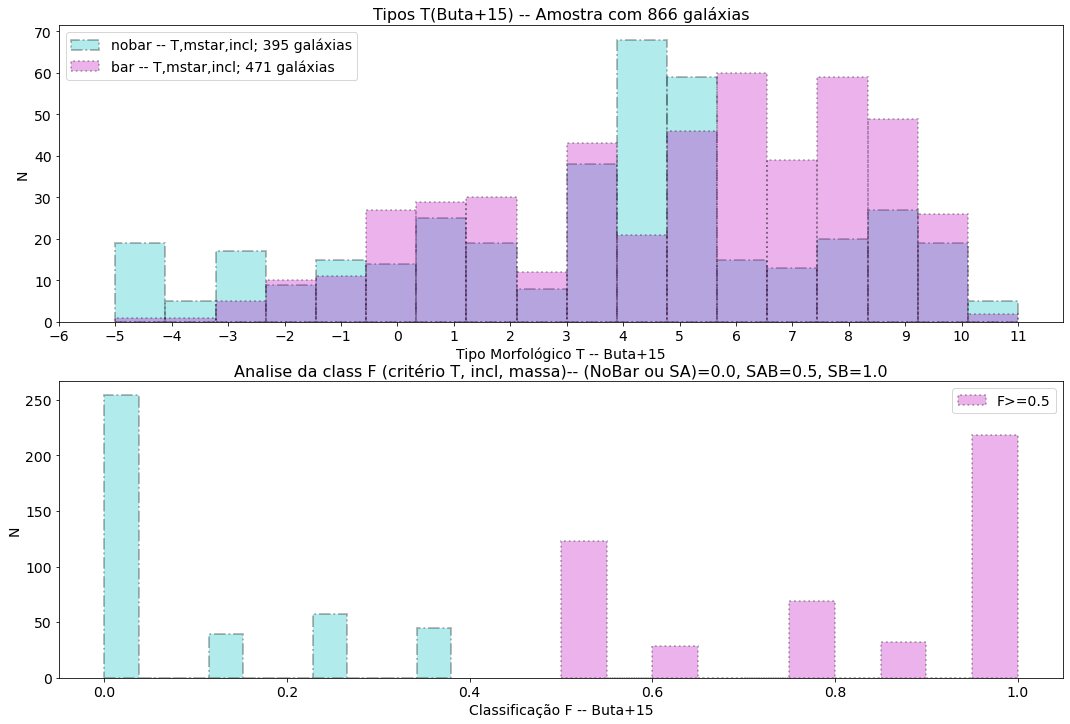

In [16]:
#corte de galaxias massivas
bar_in_T(s4g_nonan, T_ini= -6, T_fin=12, mstar_ini=9, mstar_fin='No',plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta_mass = espirais_buta_i65[espirais_buta_i65['mstar'] >= mstar_ini][espirais_buta_i65['mstar'] < mstar_fin]
/tmp/ipykernel_93873/3278016298.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_barradas_buta_mass = espirais_barradas_buta_i65[espirais_barradas_buta_i65['mstar'] >=mstar_ini][espirais_barradas_buta_i65['mstar'] < mstar_fin]


Então temos que de um total de 2206 galáxias

2206 estão dentro do critério T de:  -6 -- 12

1195 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 54.170   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  404 galáxias

Onde,  240 possuem barra, assim:  59.406  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  404 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  6.3 
Média amostra com barras: 6.784166666666667
Desvio padrão:  3.3246677791298396 
Desvio padrão da amostra com barras:  2.7009719186906676
Mediana:  (7.0, '^+ ', 2.6246677791298394, '_-', -4.02466777912984) 
Mediana da amostra com barras:  (7.5, '^+ ', 1

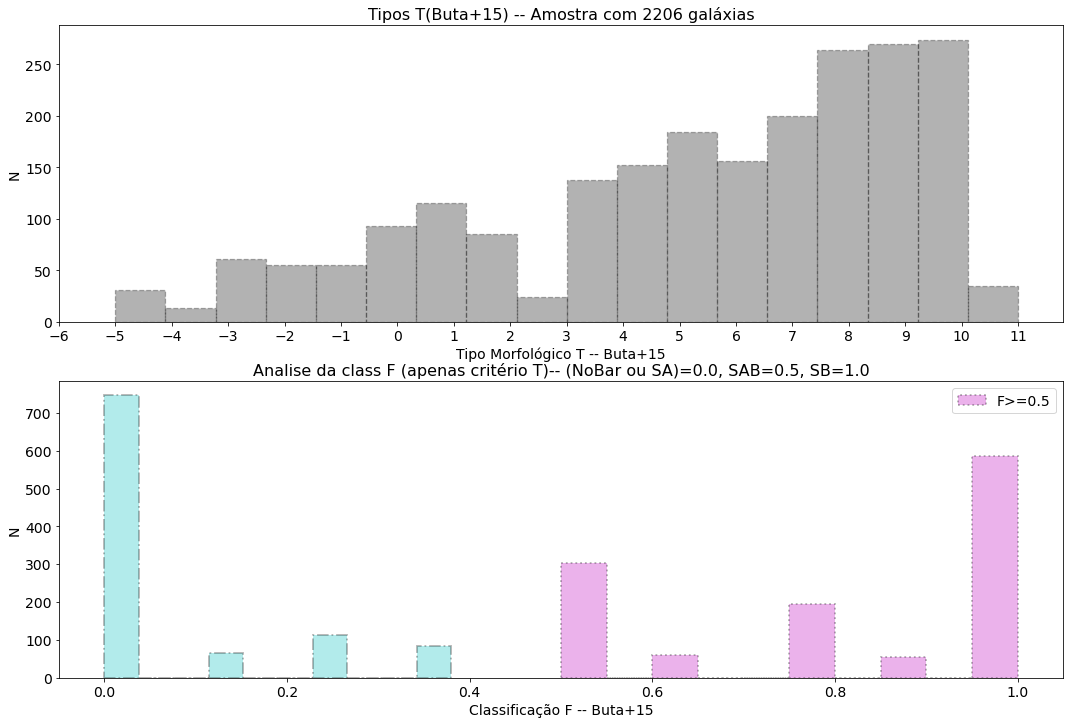

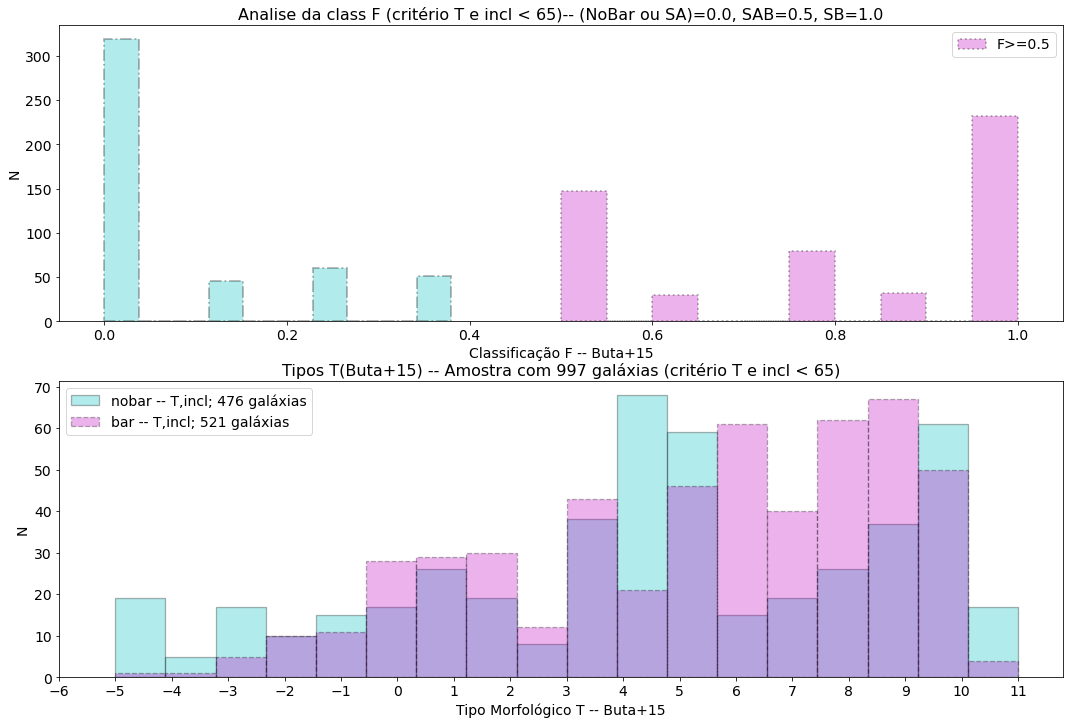

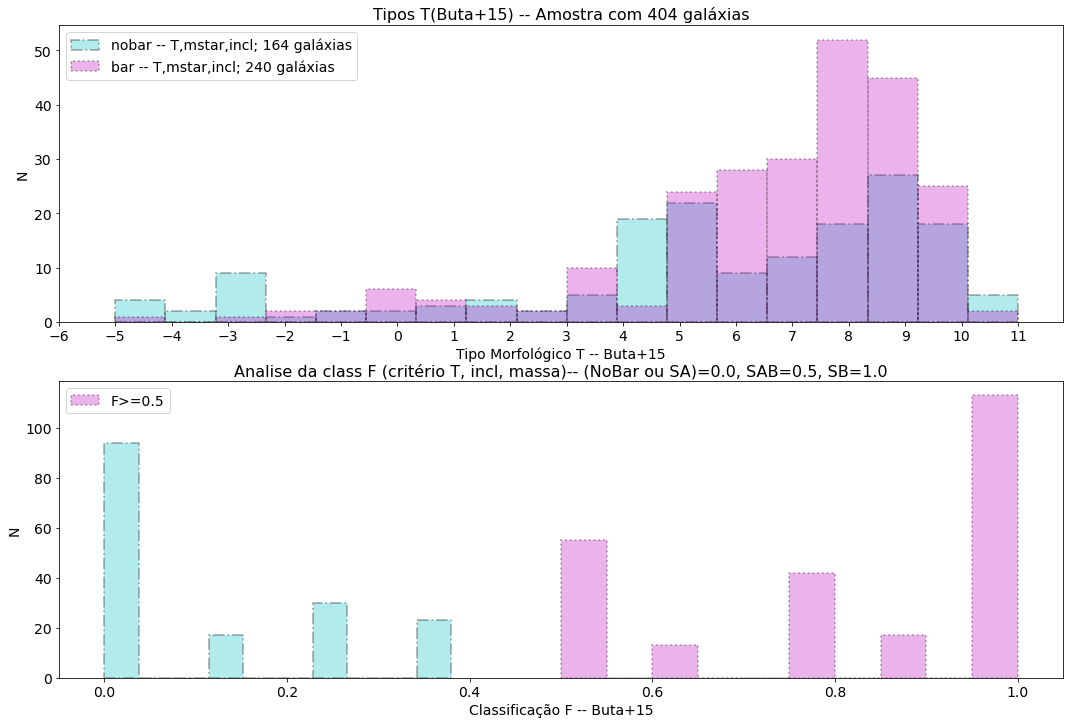

In [17]:
#corte de galaxias massivas intermediárias
bar_in_T(s4g_nonan, T_ini= -6, T_fin=12, mstar_ini=9, mstar_fin=10,plot=True, saveplot=True)

Então temos que de um total de 2206 galáxias

2206 estão dentro do critério T de:  -6 -- 12

1195 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 54.170   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  997 galáxias

Onde,  521 possuem barra, assim:  52.257  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  462 galáxias

Onde,  231 possuem barra, assim:  50.000  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  462 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  2.5857142857142863 
Média amostra com barras: 3.054112554112554
Desvio padrão:  2.987030302980111 
Desvio padrão da amostra com barras:  2.787707706293801
Mediana:  (3.0, '^+ ', 2.5727445886943974, '_-', -3.4013160172658248) 
Mediana da amostra com barras: 

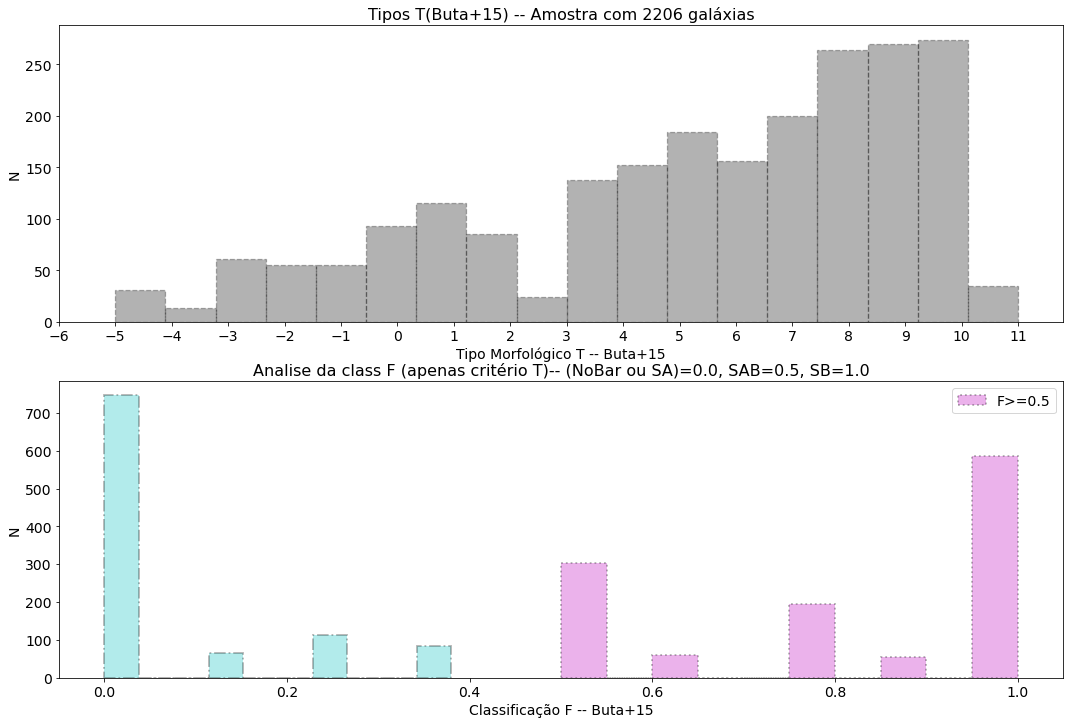

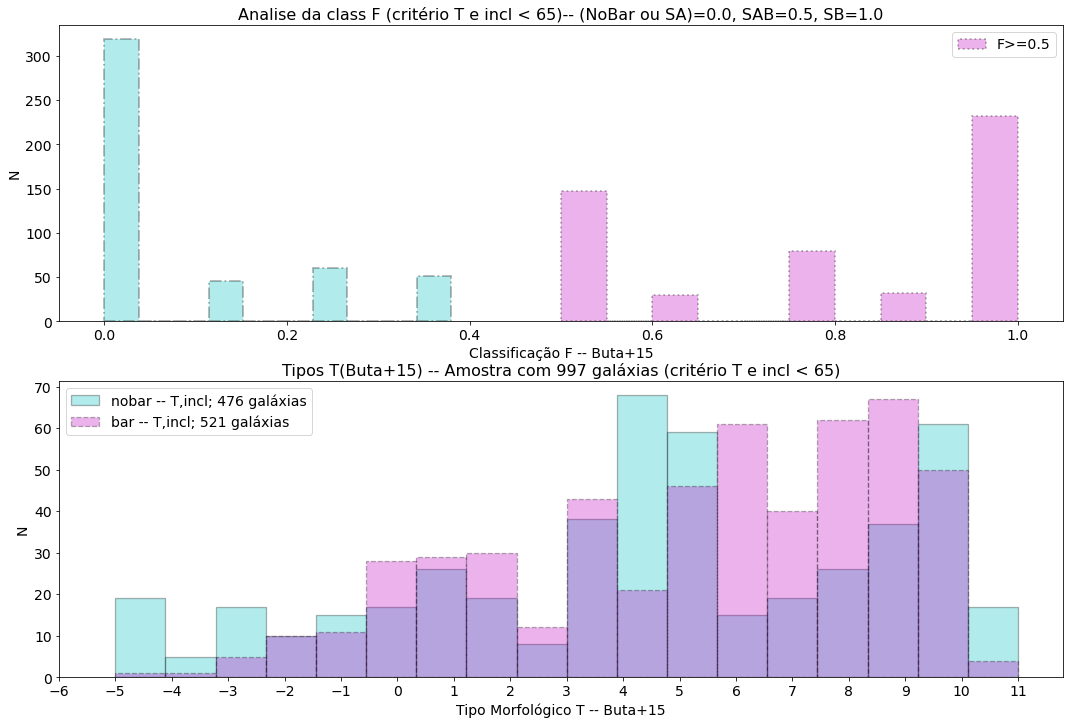

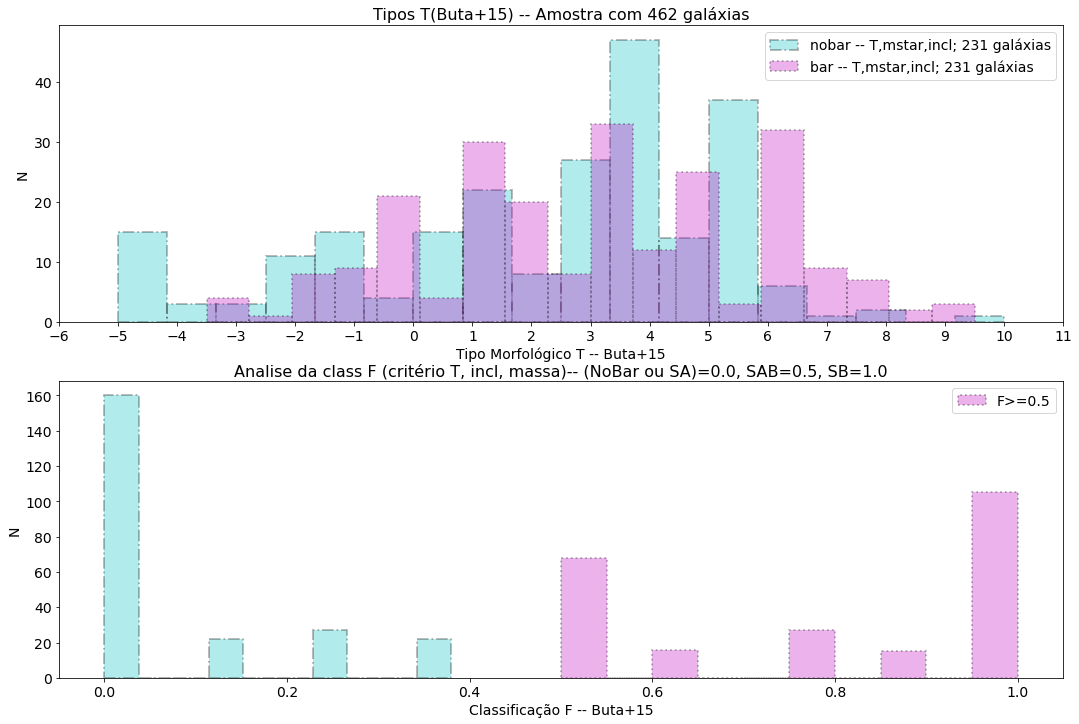

In [18]:
#corte de galaxias muito massivas
bar_in_T(s4g_nonan, T_ini= -6, T_fin=12, mstar_ini=10, mstar_fin='No',plot=True, saveplot=True)

## Olhando para espirais ---- Cortes: 0-7; 0-9 

Basta mudar os valores de T_ini e T_fin para verificar os valores 

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 2206 galáxias

1122 estão dentro do critério T de:  0 -- 7

588 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 52.406   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  567 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  3.934038800705468 
Média amostra com barras: 4.0230263157894735
Desvio padrão:  2.0895950558930485 
Desvio padrão da amostra com barras:  2.274312226711767
Mediana:  (4.0, '^+ ', 2.0236338565985164, '_-', -2.1555562551875806) 
Mediana da amostra com barras:  (

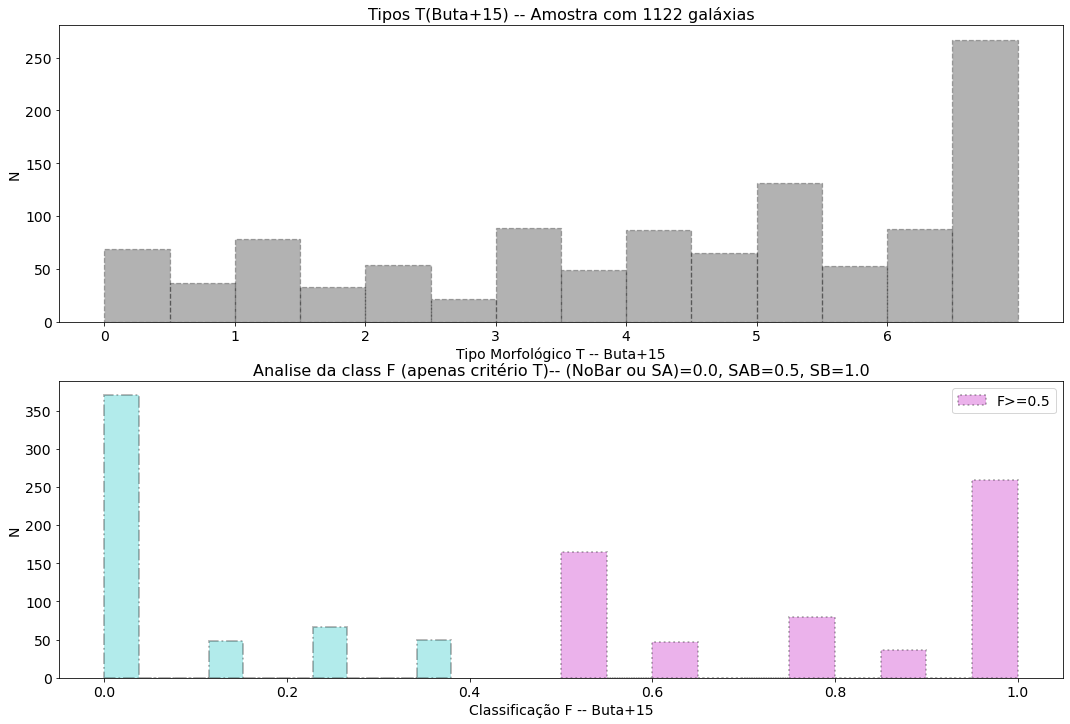

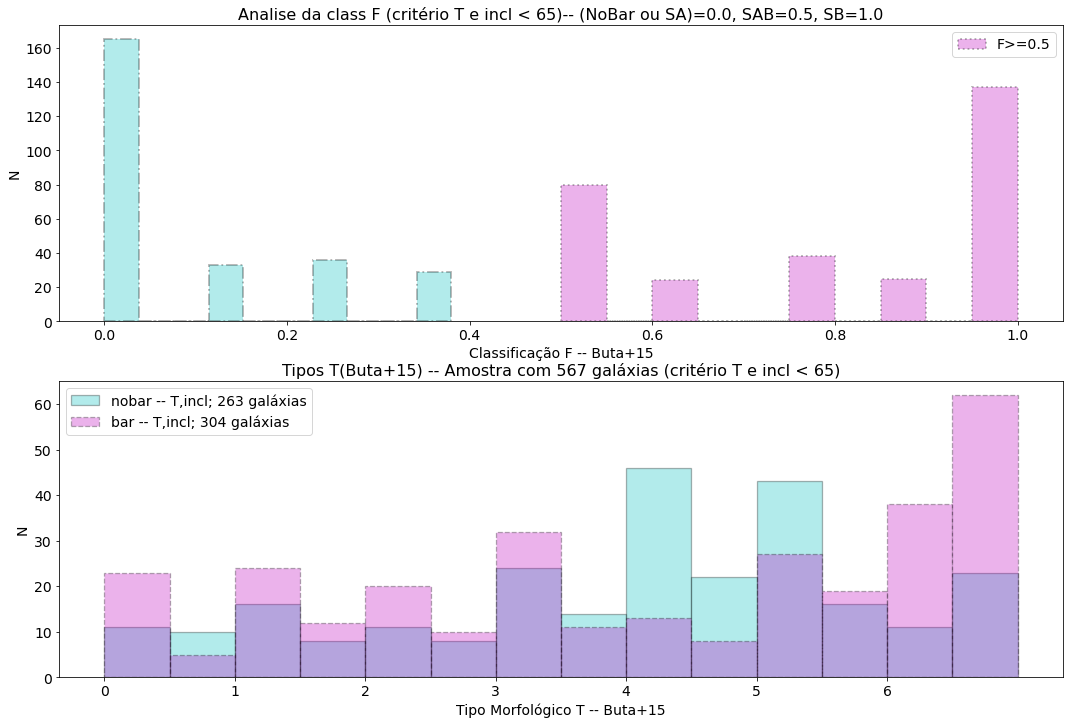

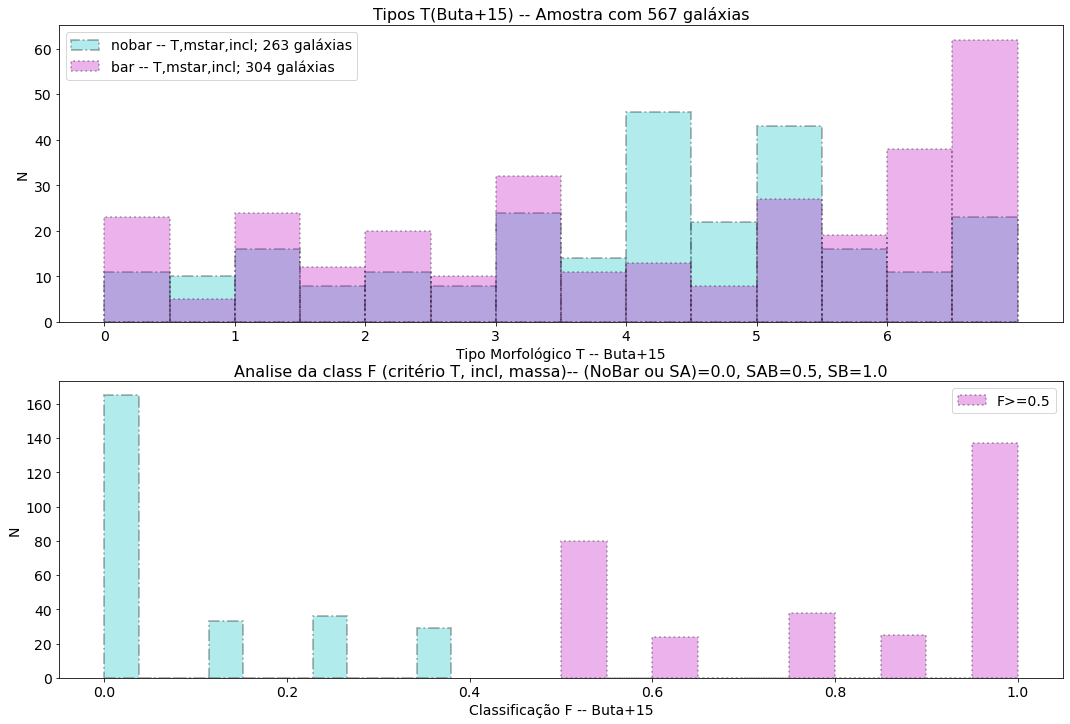

In [19]:
#Espirais -- sem corte de massa
bar_in_T(s4g_nonan, T_ini= 0, T_fin=7, mstar_ini=5, mstar_fin='No',plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 2206 galáxias

1122 estão dentro do critério T de:  0 -- 7

588 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 52.406   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  11 galáxias

Onde,  2 possuem barra, assim:  18.182  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  11 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  5.136363636363637 
Média amostra com barras: 6.75
Desvio padrão:  2.954895084208183 
Desvio padrão da amostra com barras:  0.25
Mediana:  (7.0, '^+ ', 1.0912587205718198, '_-', -4.8185314478445465) 
Mediana da amostra com barras:  (6.75, '^+ ', 0.25, '_-', -0.25) 

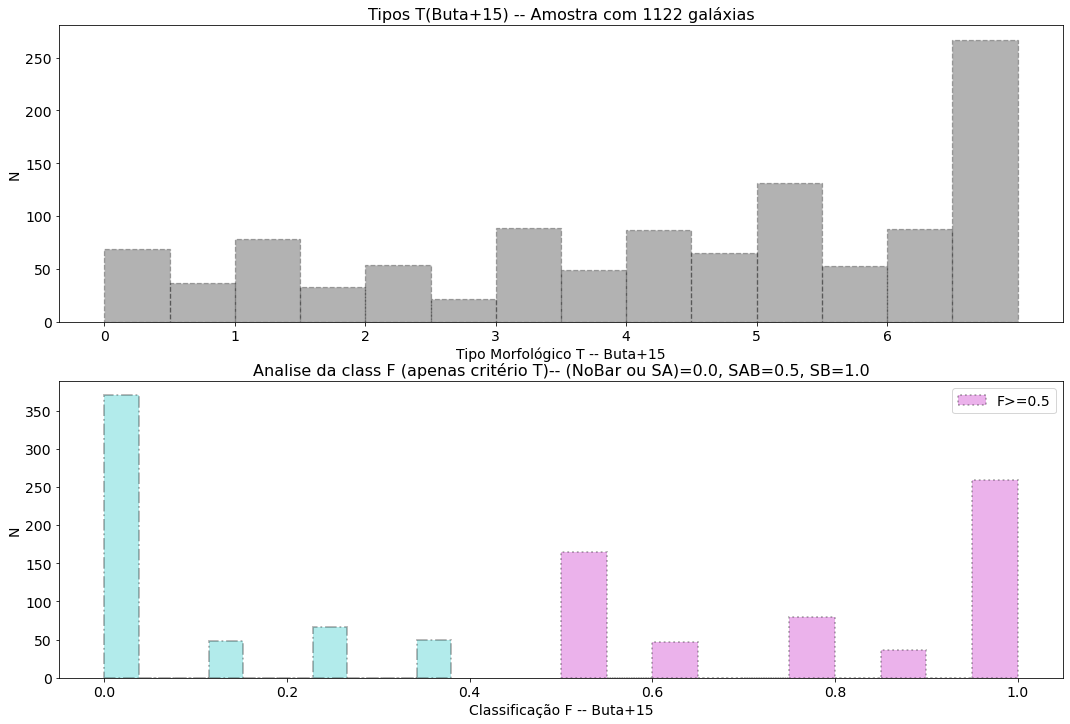

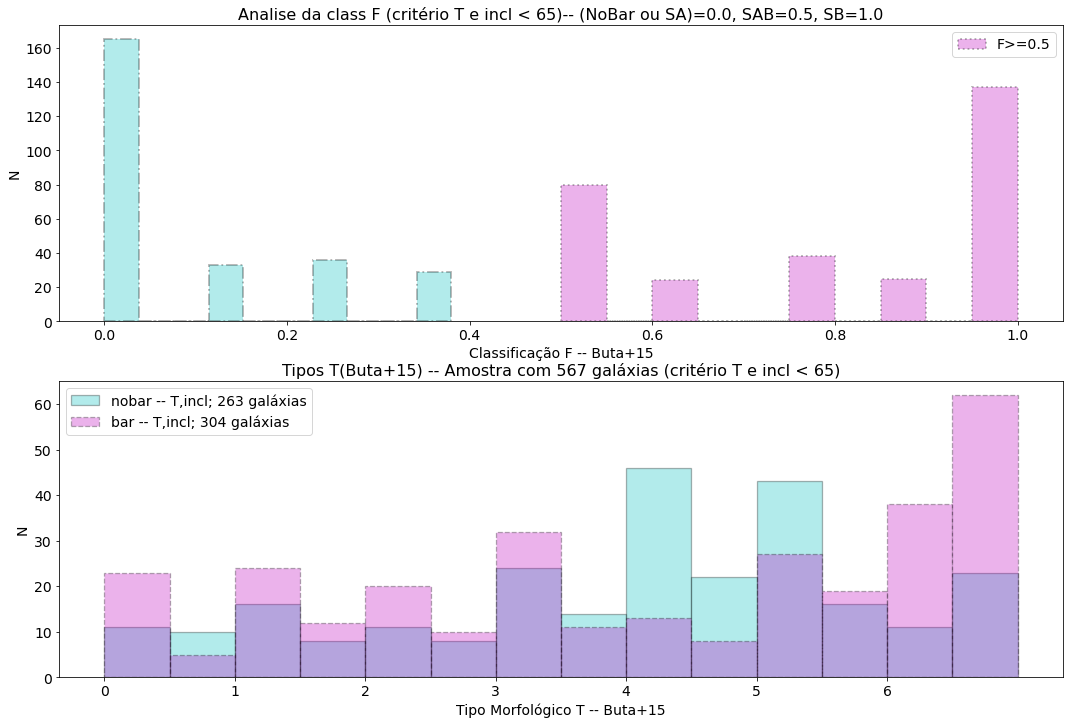

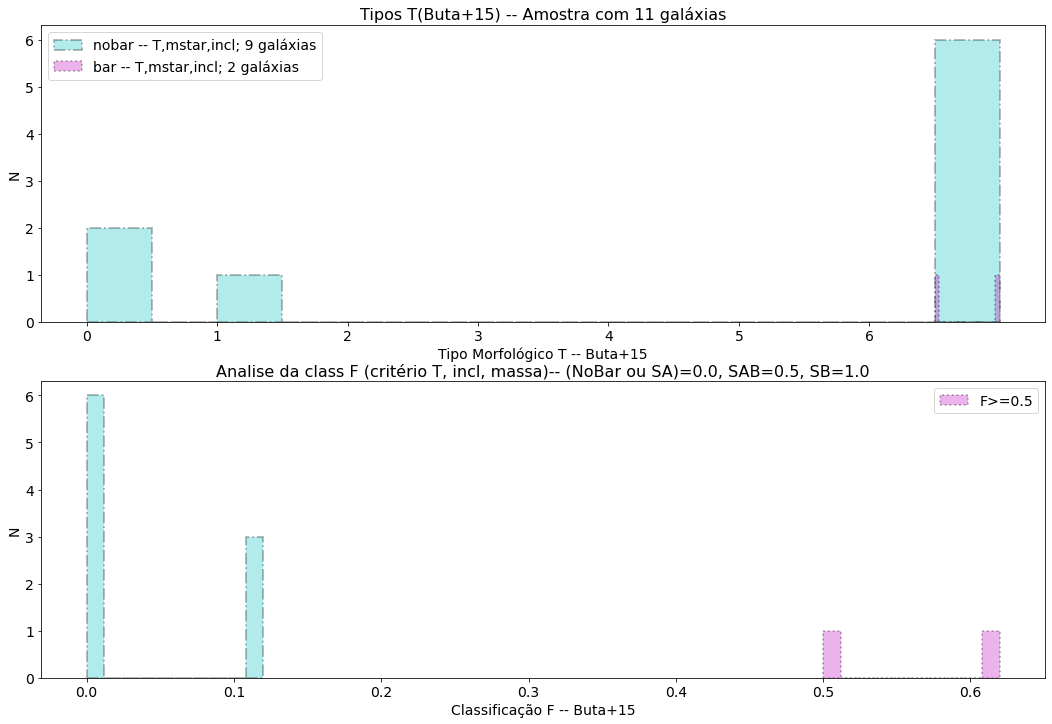

In [20]:
#Apenas espirais -- corte de galáxias anãs
bar_in_T(s4g_nonan, T_ini= 0, T_fin=7, mstar_ini=5, mstar_fin=9,plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 2206 galáxias

1122 estão dentro do critério T de:  0 -- 7

588 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 52.406   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  556 galáxias

Onde,  302 possuem barra, assim:  54.317  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  556 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  3.9102517985611516 
Média amostra com barras: 4.004966887417218
Desvio padrão:  2.0617672296501683 
Desvio padrão da amostra com barras:  2.27085081181032
Mediana:  (4.0, '^+ ', 1.97201902821132, '_-', -2.1515154310890168) 
Mediana da amostra com barras:  (4.5

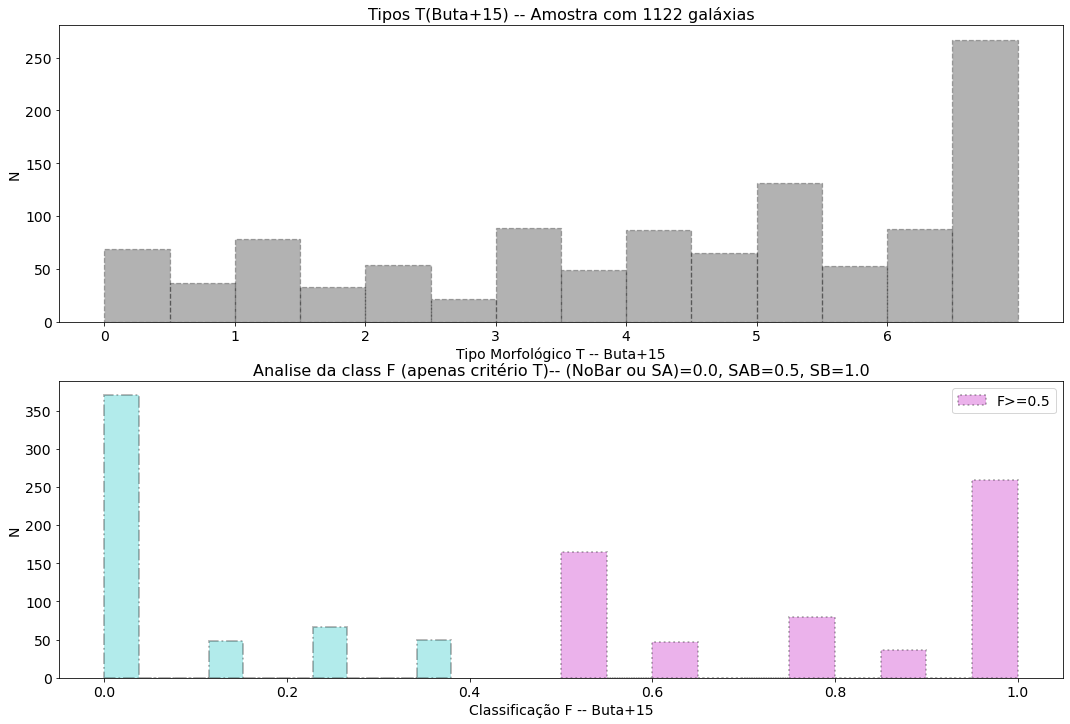

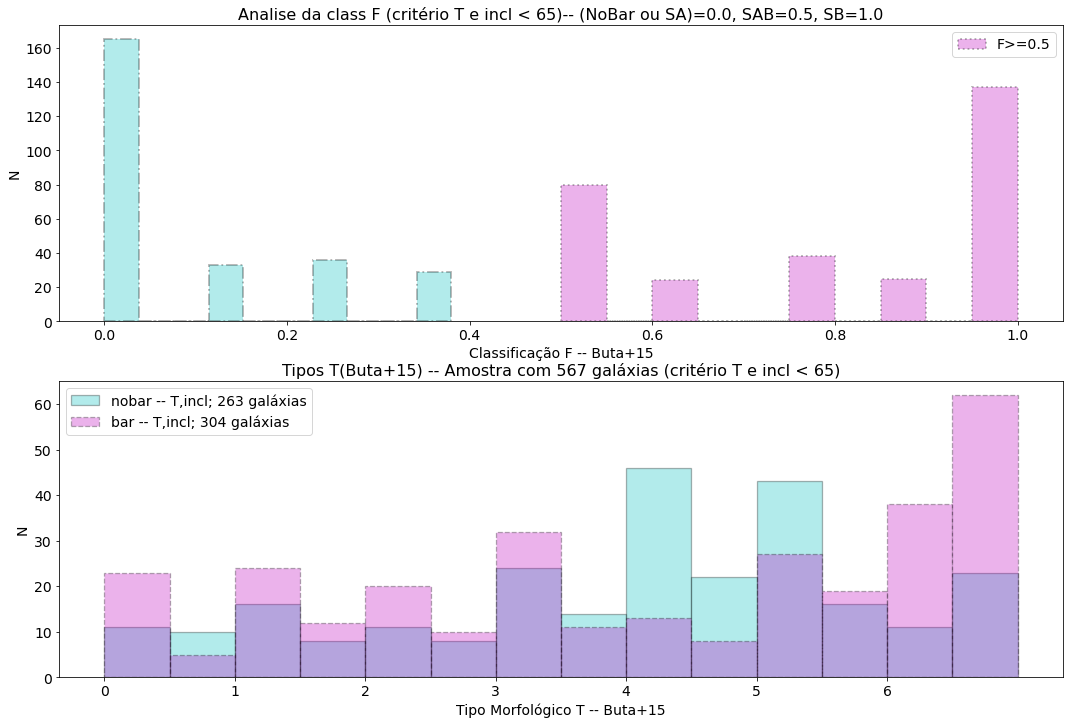

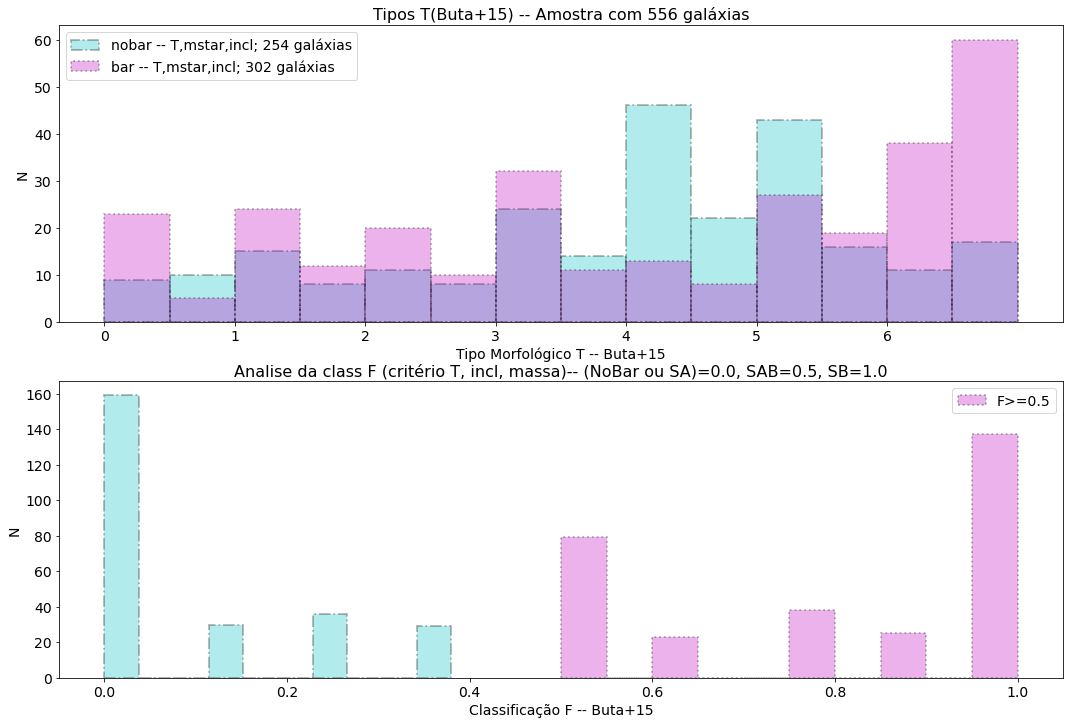

In [21]:
#Apenas espirais -- corte de galaxias massivas
bar_in_T(s4g_nonan, T_ini= 0, T_fin=7, mstar_ini=9, mstar_fin='No',plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]
/tmp/ipykernel_93873/3278016298.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta_mass = espirais_buta_i65[espirais_buta_i65['mstar'] >= mstar_ini][espirais_buta_i65['mstar'] < mstar_fin]
/tmp/ipykernel_93873/3278016298.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_barradas_buta_mass = espirais_barradas_buta_i65[espirais_barradas_buta_i65['mstar'] >=mstar_ini][espirais_barradas_buta_i65['mstar'] < mstar_fin]


Então temos que de um total de 2206 galáxias

1122 estão dentro do critério T de:  0 -- 7

588 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 52.406   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  185 galáxias

Onde,  108 possuem barra, assim:  58.378  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  185 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  5.0162162162162165 
Média amostra com barras: 5.226851851851852
Desvio padrão:  1.890161370704787 
Desvio padrão da amostra com barras:  1.9900030933105255
Mediana:  (5.5, '^+ ', 1.4063775869210036, '_-', -2.3739451544885704) 
Mediana da amostra com barras:  (

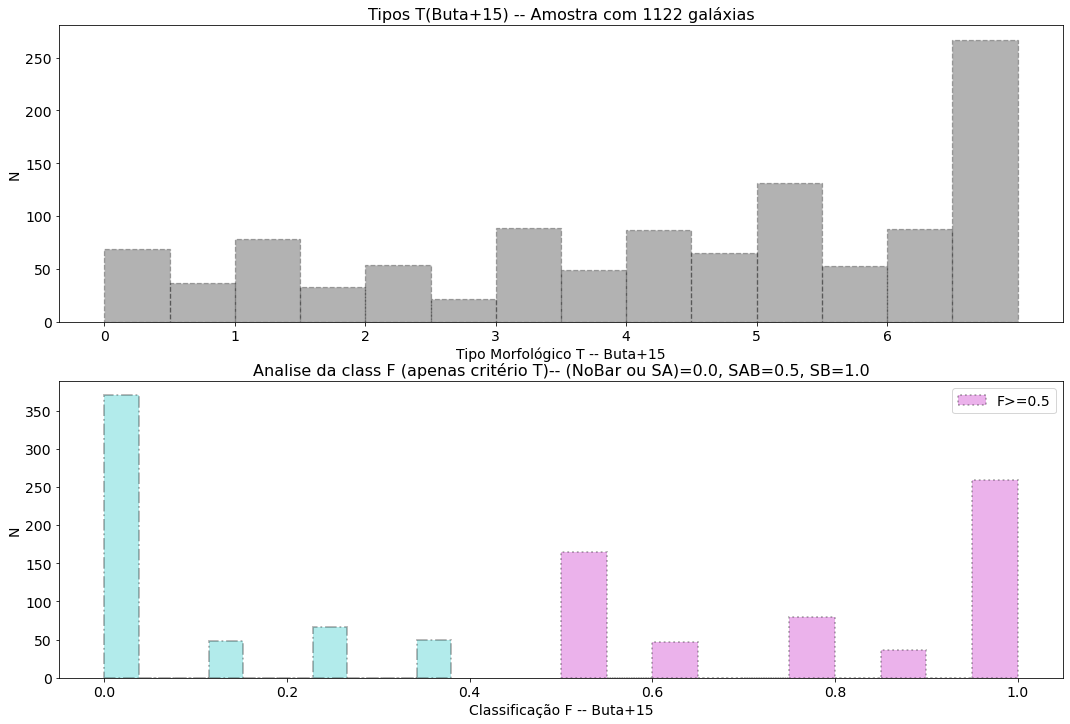

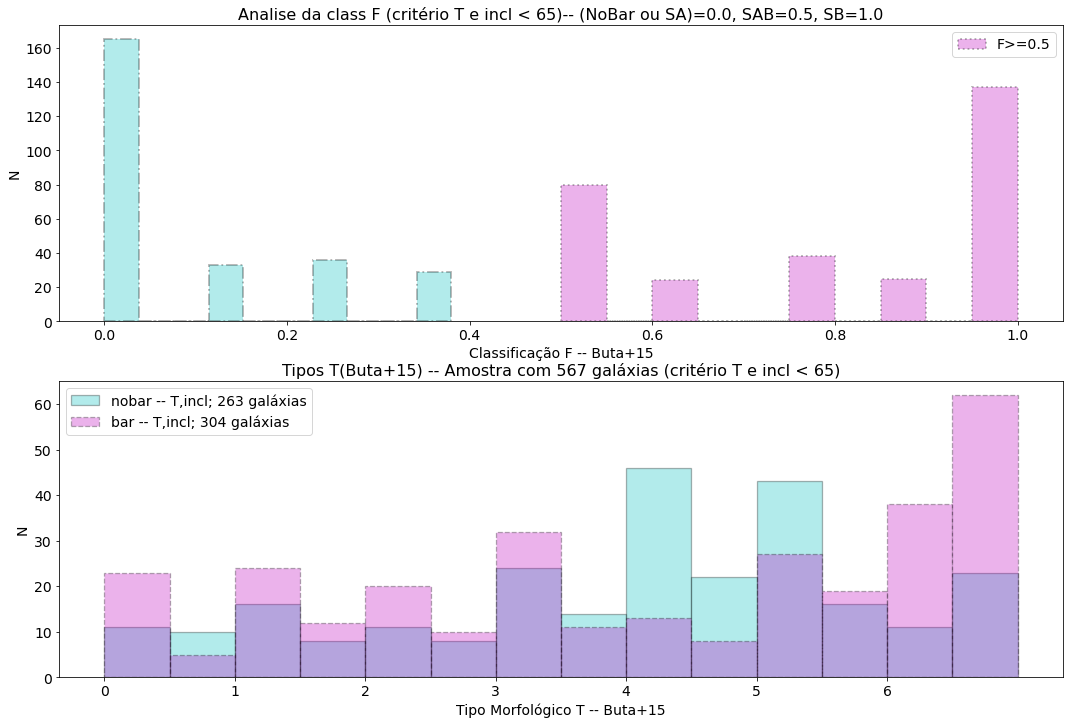

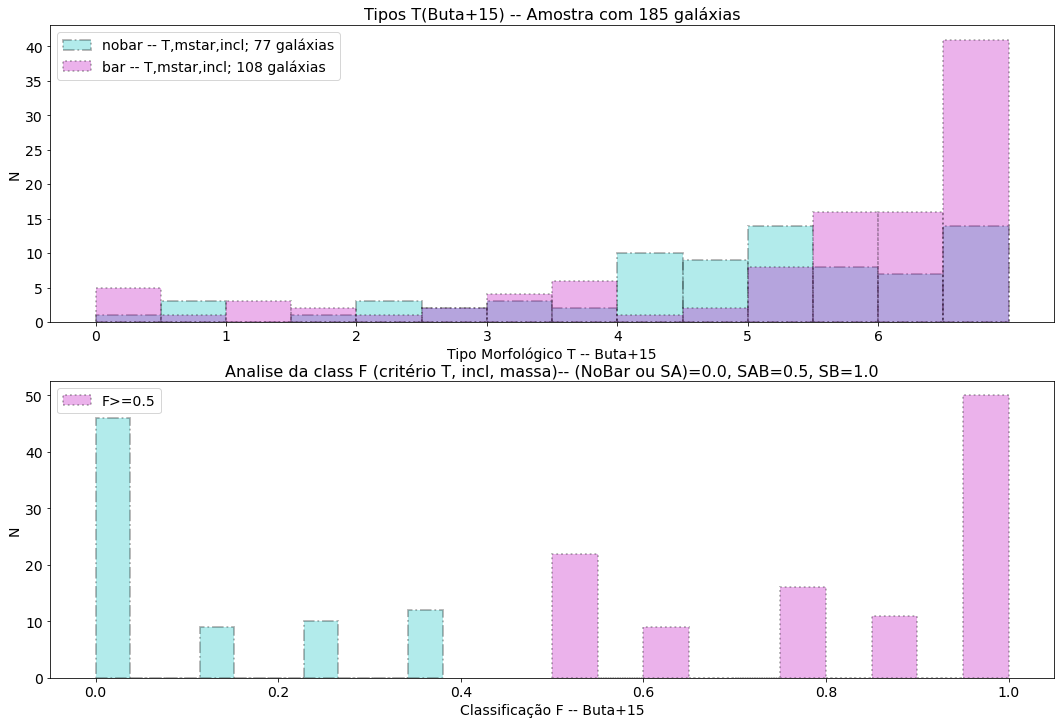

In [22]:
#Apenas espirais -- corte de galaxias massivas intermediárias
bar_in_T(s4g_nonan, T_ini= 0, T_fin=7, mstar_ini=9, mstar_fin=10,plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 2206 galáxias

1122 estão dentro do critério T de:  0 -- 7

588 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 52.406   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  567 galáxias

Onde,  304 possuem barra, assim:  53.616  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  371 galáxias

Onde,  194 possuem barra, assim:  52.291  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  371 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  3.3587601078167126 
Média amostra com barras: 3.3247422680412373
Desvio padrão:  1.917024753990232 
Desvio padrão da amostra com barras:  2.1281631849606026
Mediana:  (3.5, '^+ ', 1.7757848618069447, '_-', -2.0582646461735195) 
Mediana da amostra com barras:  

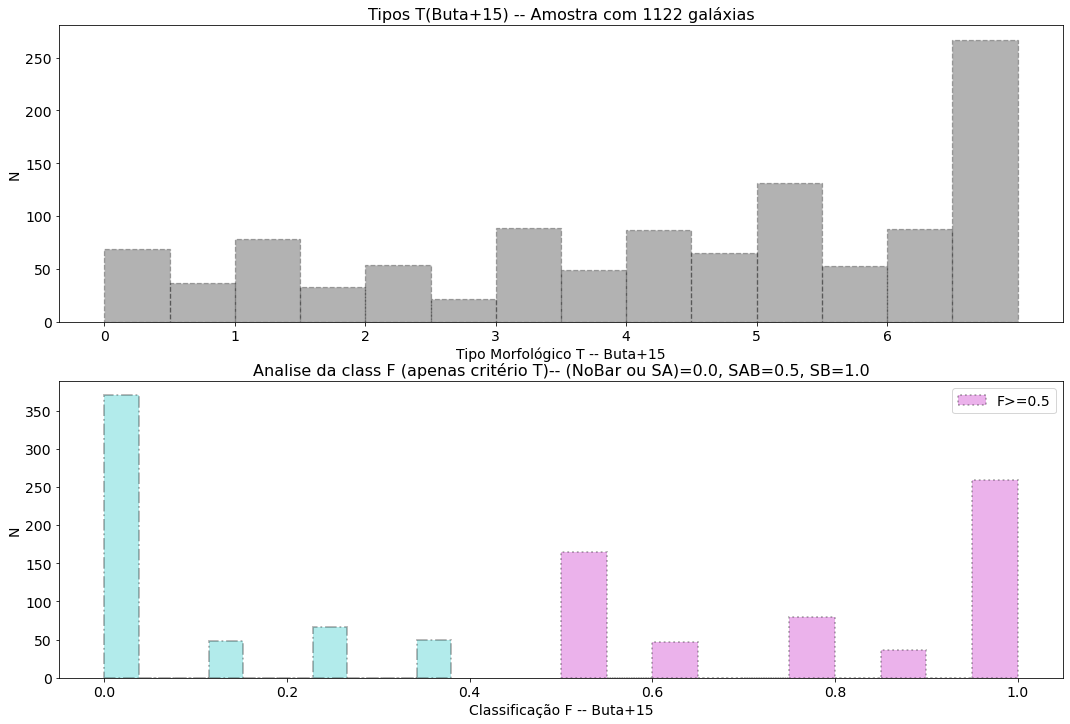

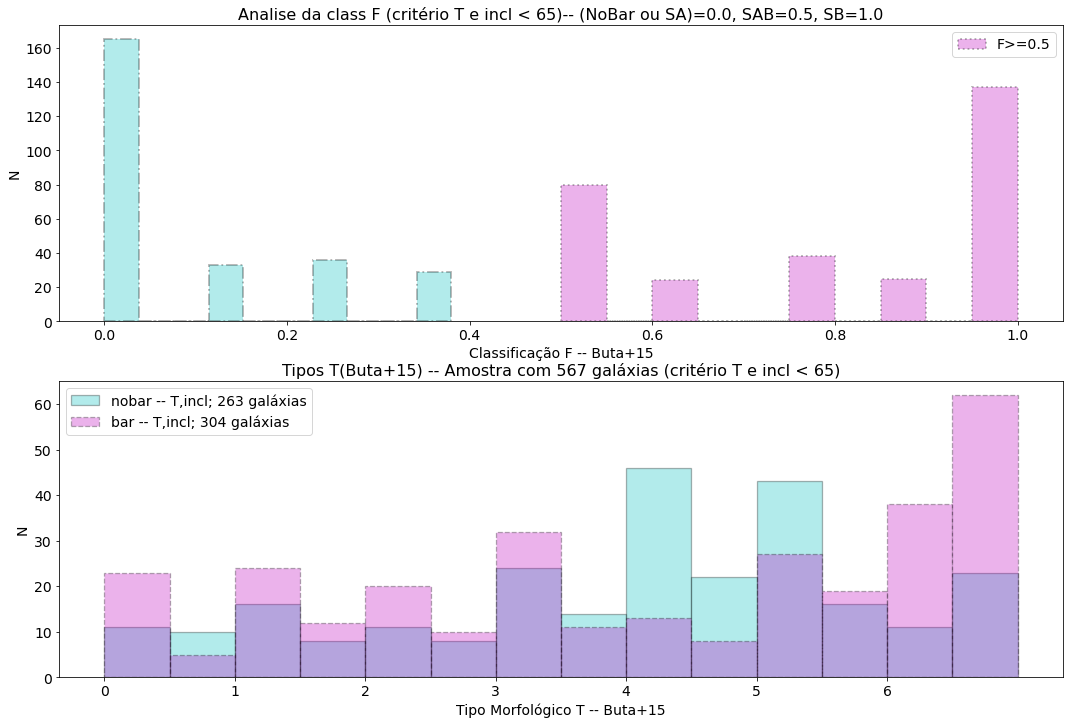

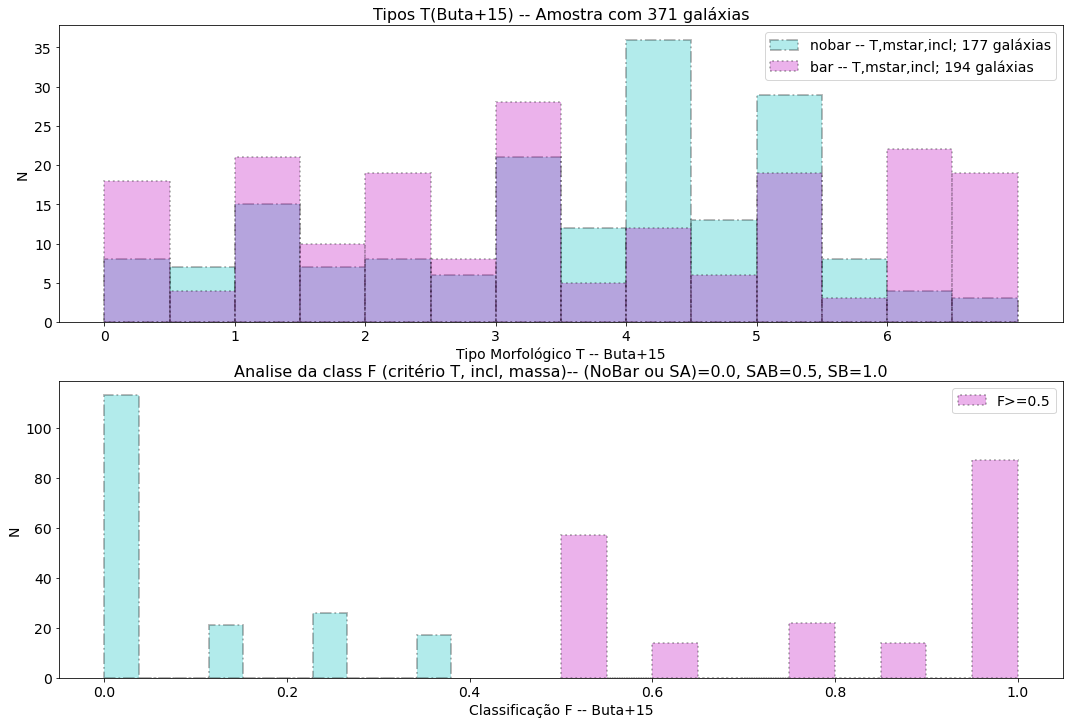

In [23]:
#Apenas espirais -- corte de galaxias muito massivas
bar_in_T(s4g_nonan, T_ini= 0, T_fin=7, mstar_ini=10, mstar_fin='No',plot=True, saveplot=False)

### Olhando para a nossa amostra 

Note que filtramos por galáxias com componente barra em sua decomposição. Isso não quer dizer necessariamente que ela foi classificada como barrada em Buta et al. 2015.

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

426 estão dentro do critério T de:  -6 -- 12

371 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.089   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  426 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.820422535211268 
Média amostra com barras: 4.88544474393531
Desvio padrão:  3.313300952486164 
Desvio padrão da amostra com barras:  3.297667803518805
Mediana:  (5.5, '^+ ', 2.633723487697432, '_-', -3.992878417274896) 
Mediana da amostra com barras:  (6.0, 

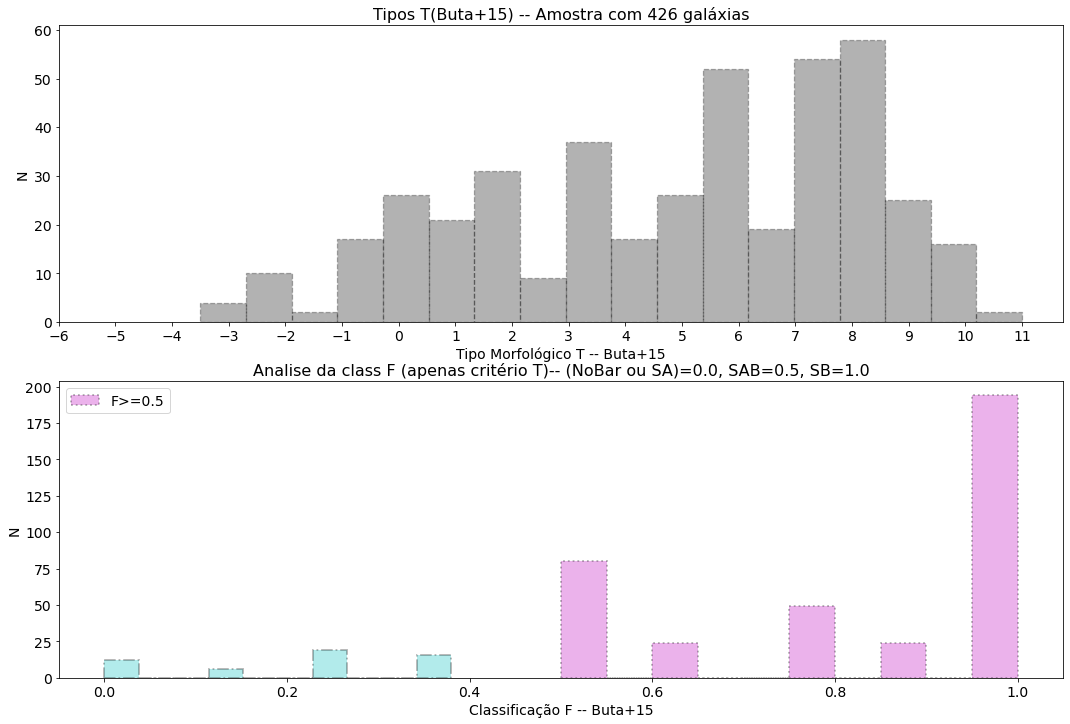

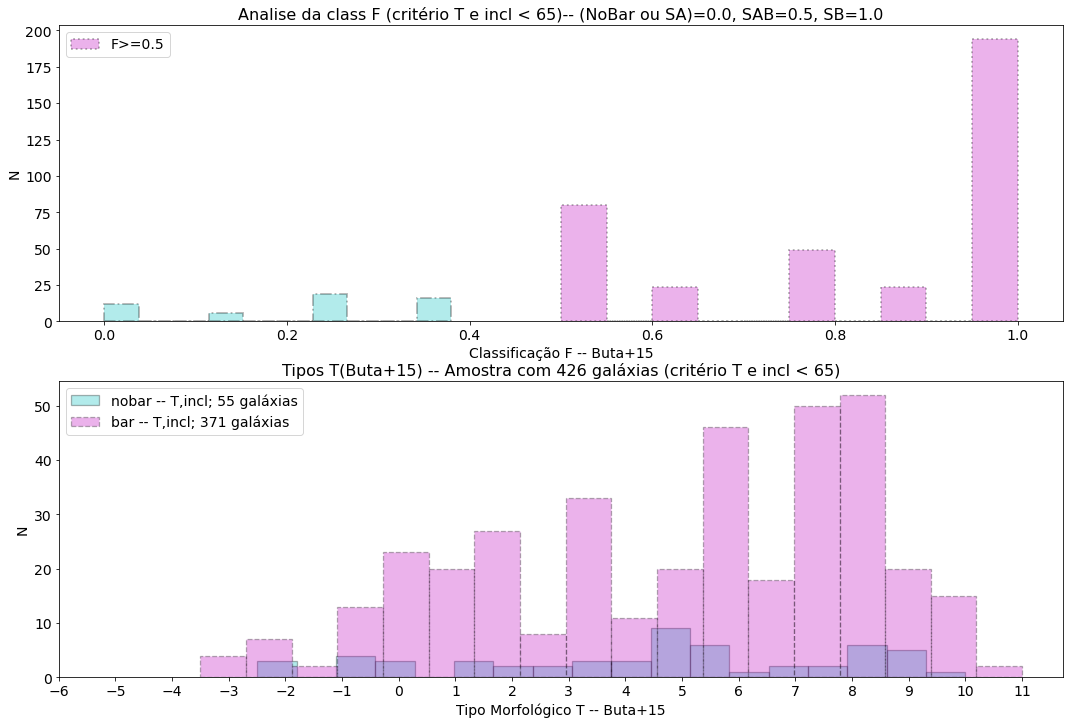

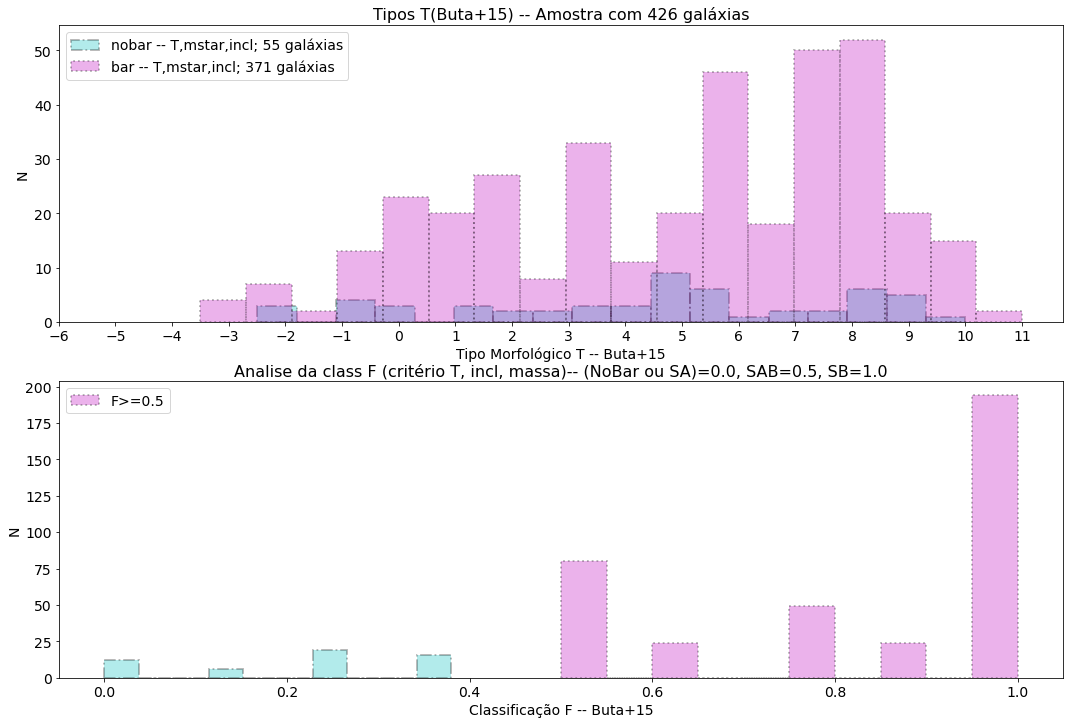

In [24]:
bar_in_T(amostra_430, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin=14,plot=True, saveplot=True)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

275 estão dentro do critério T de:  0 -- 7

241 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.636   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  275 galáxias

Onde,  241 possuem barra, assim:  87.636  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  275 galáxias

Onde,  241 possuem barra, assim:  87.636  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  275 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.0065454545454555 
Média amostra com barras: 4.019917012448133
Desvio padrão:  2.290175235996198 
Desvio padrão da amostra com barras:  2.3370233206820616
Mediana:  (4.5, '^+ ', 1.7967206905416537, '_-', -2.7836297814507427) 
Mediana da amostra com barras:  (4.

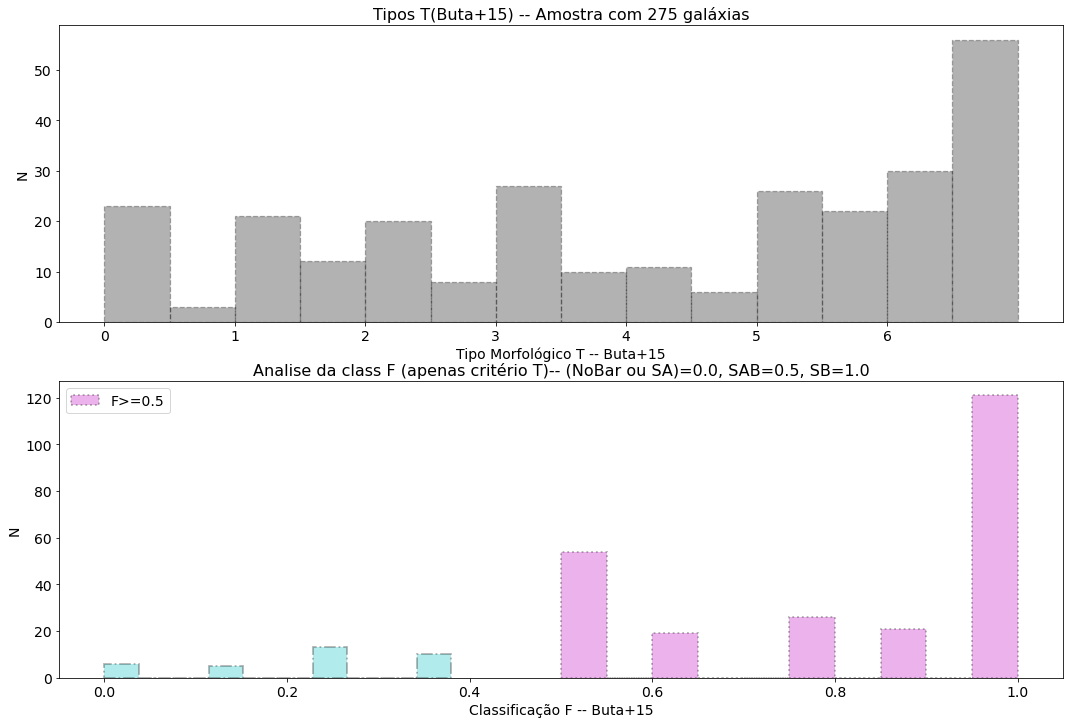

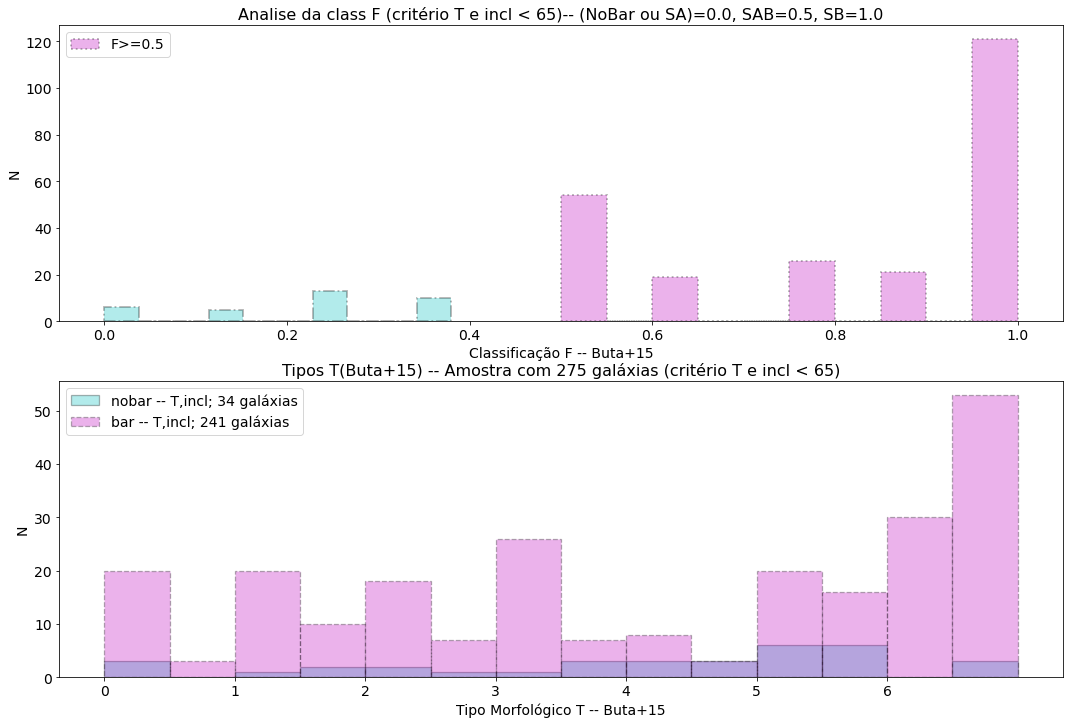

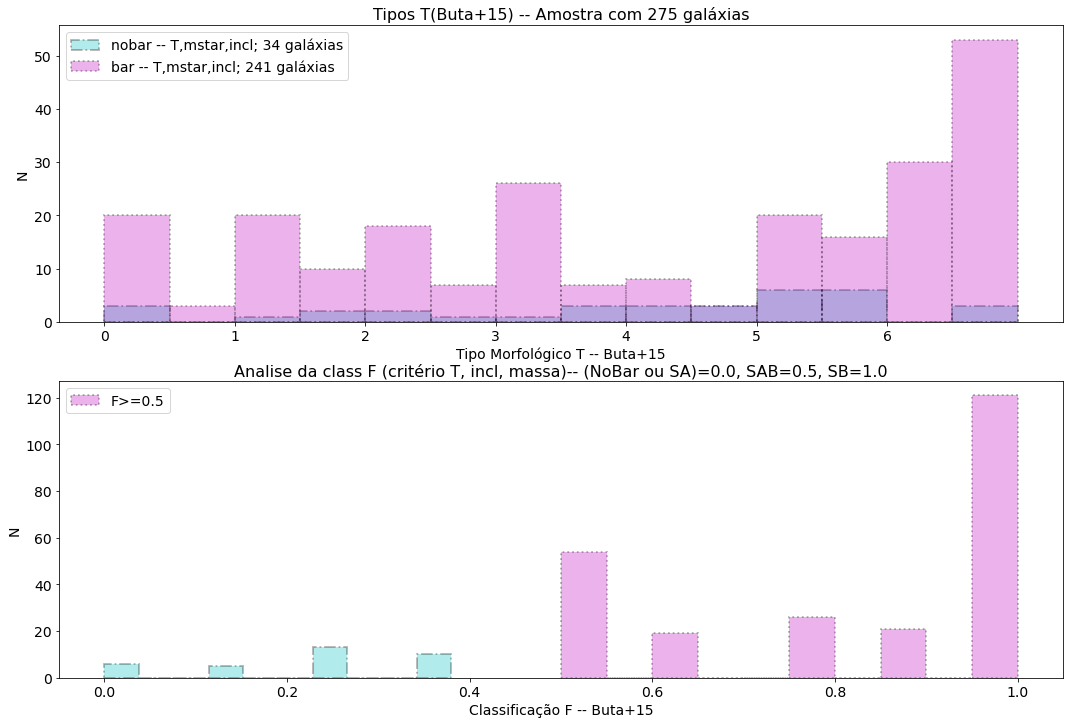

In [25]:
#espirais
bar_in_T(amostra_430, T_ini= 0, T_fin=7, mstar_ini=5, mstar_fin=14,plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

275 estão dentro do critério T de:  0 -- 7

241 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.636   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  275 galáxias

Onde,  241 possuem barra, assim:  87.636  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  275 galáxias

Onde,  241 possuem barra, assim:  87.636  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  275 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.0065454545454555 
Média amostra com barras: 4.019917012448133
Desvio padrão:  2.290175235996198 
Desvio padrão da amostra com barras:  2.3370233206820616
Mediana:  (4.5, '^+ ', 1.7967206905416537, '_-', -2.7836297814507427) 
Mediana da amostra com barras:  (4.

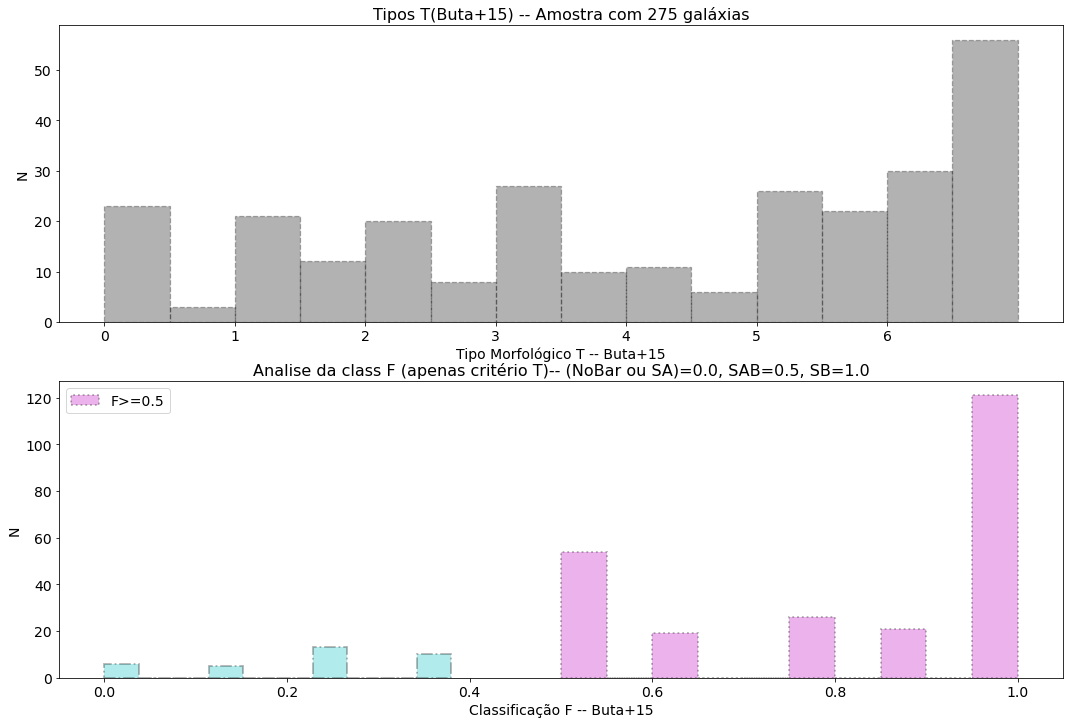

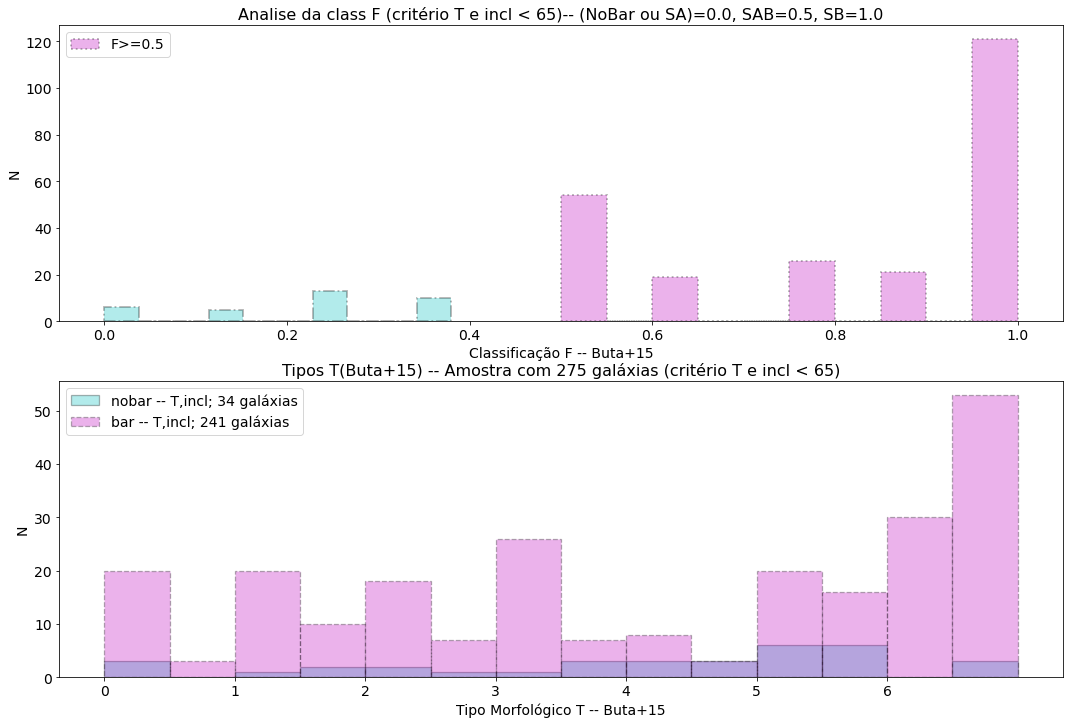

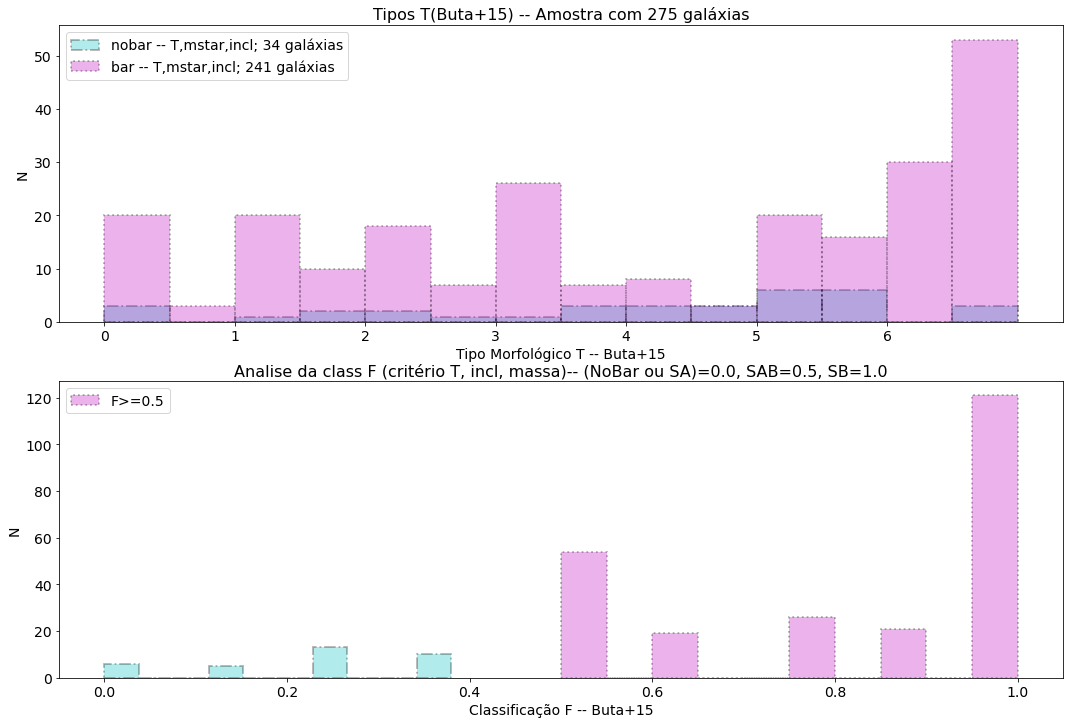

In [26]:
#espirais massivas
bar_in_T(amostra_430, T_ini= 0, T_fin=7, mstar_ini=5, mstar_fin='No',plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

426 estão dentro do critério T de:  -6 -- 12

371 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.089   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  12 galáxias

Onde,  9 possuem barra, assim:  75.000  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  12 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  7.791666666666667 
Média amostra com barras: 7.833333333333333
Desvio padrão:  2.7115365672539906 
Desvio padrão da amostra com barras:  3.1180478223116173
Mediana:  (8.0, '^+ ', 2.5032032339206576, '_-', -2.9198699005873237) 
Mediana da amostra com barras:  (8.5,

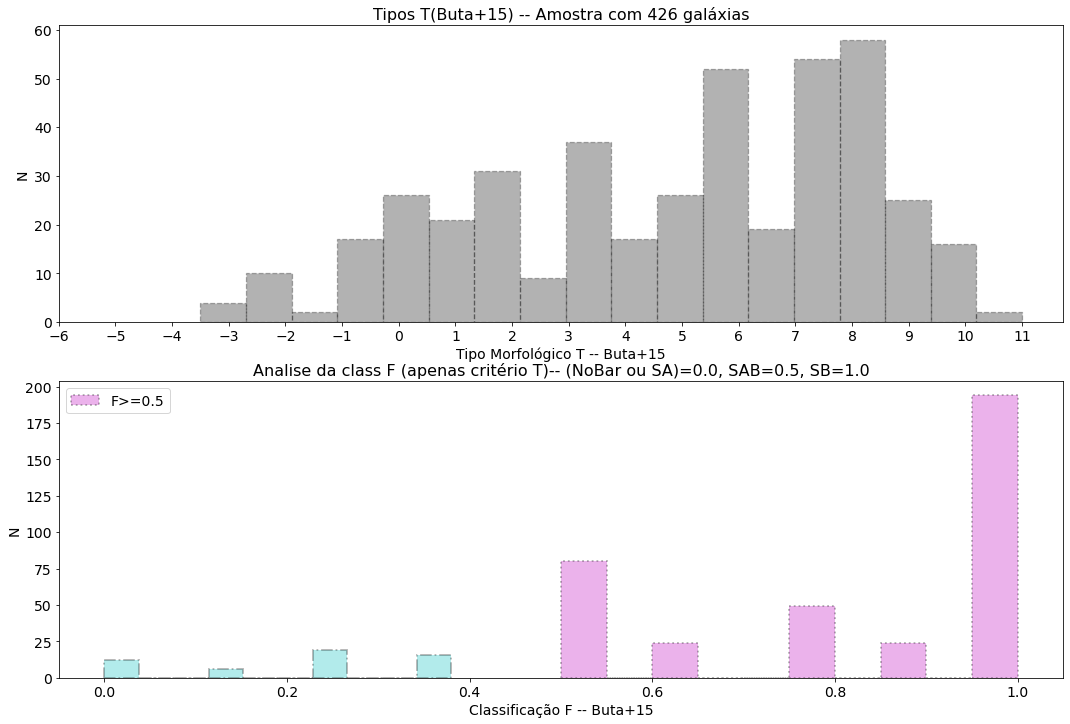

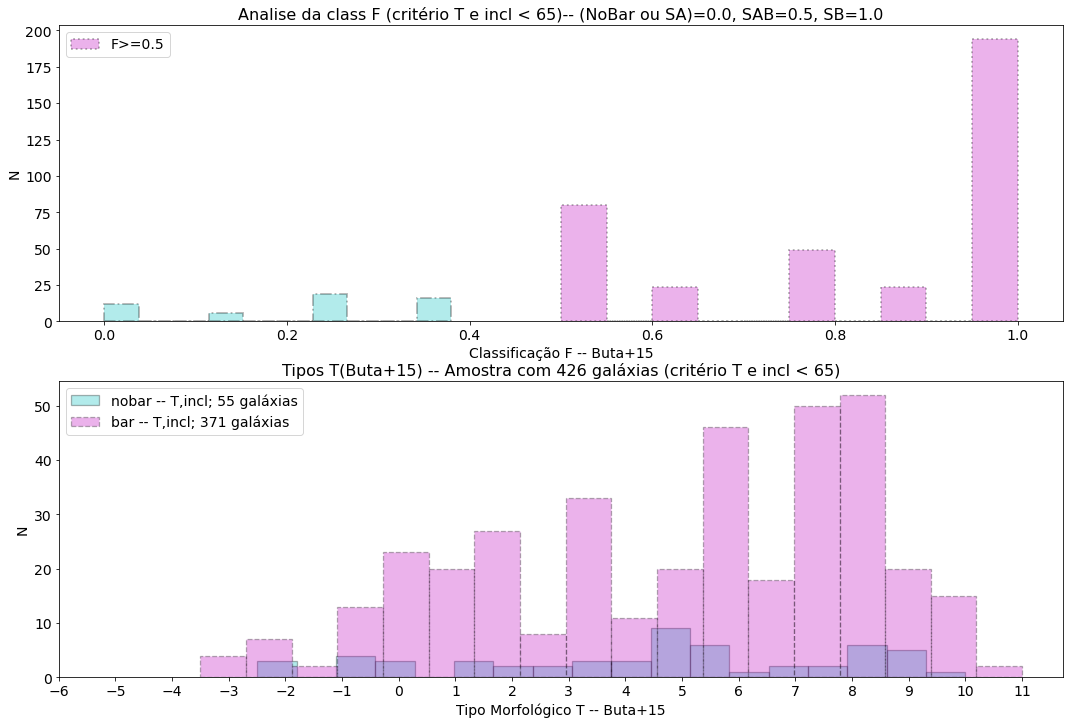

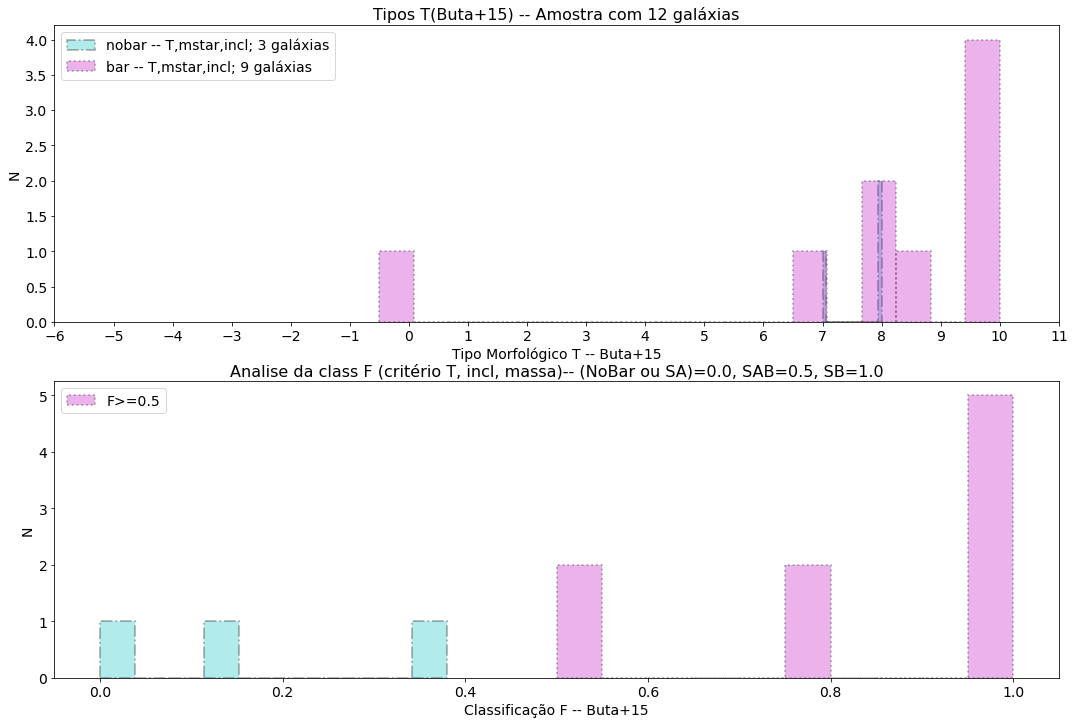

In [27]:
#anãs
bar_in_T(amostra_430, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin=9,plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

426 estão dentro do critério T de:  -6 -- 12

371 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.089   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  414 galáxias

Onde,  362 possuem barra, assim:  87.440  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  414 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.734299516908213 
Média amostra com barras: 4.812154696132597
Desvio padrão:  3.2893375347531597 
Desvio padrão da amostra com barras:  3.26830861664534
Mediana:  (5.5, '^+ ', 2.523637051661373, '_-', -4.0550380178449466) 
Mediana da amostra com barras:  (5.5

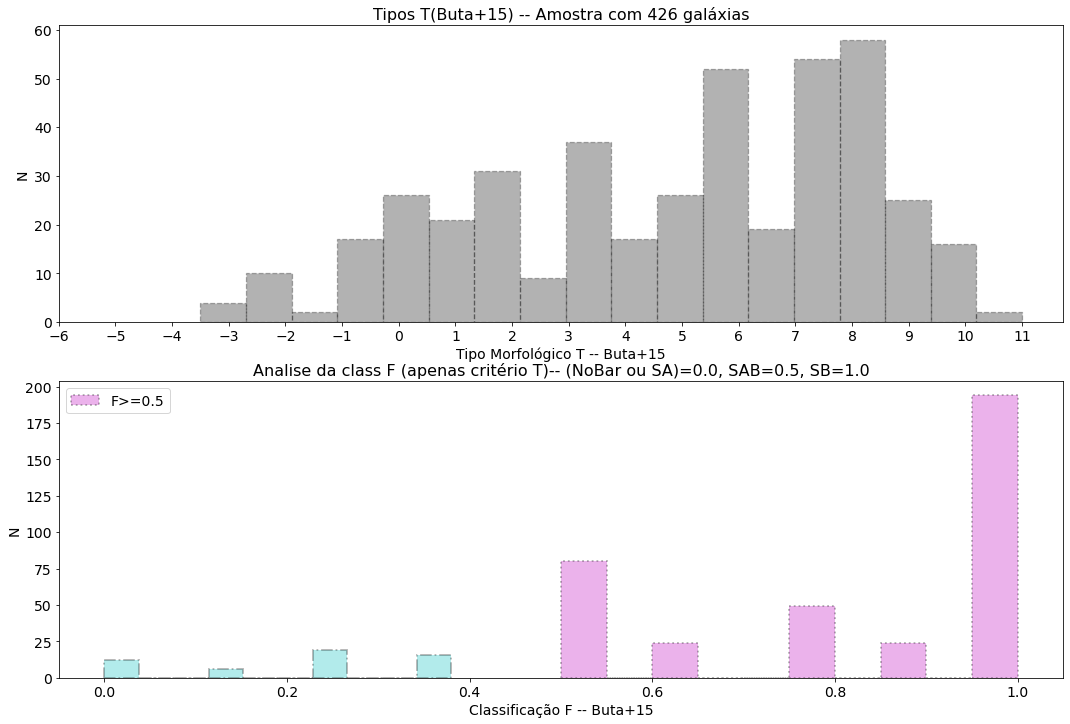

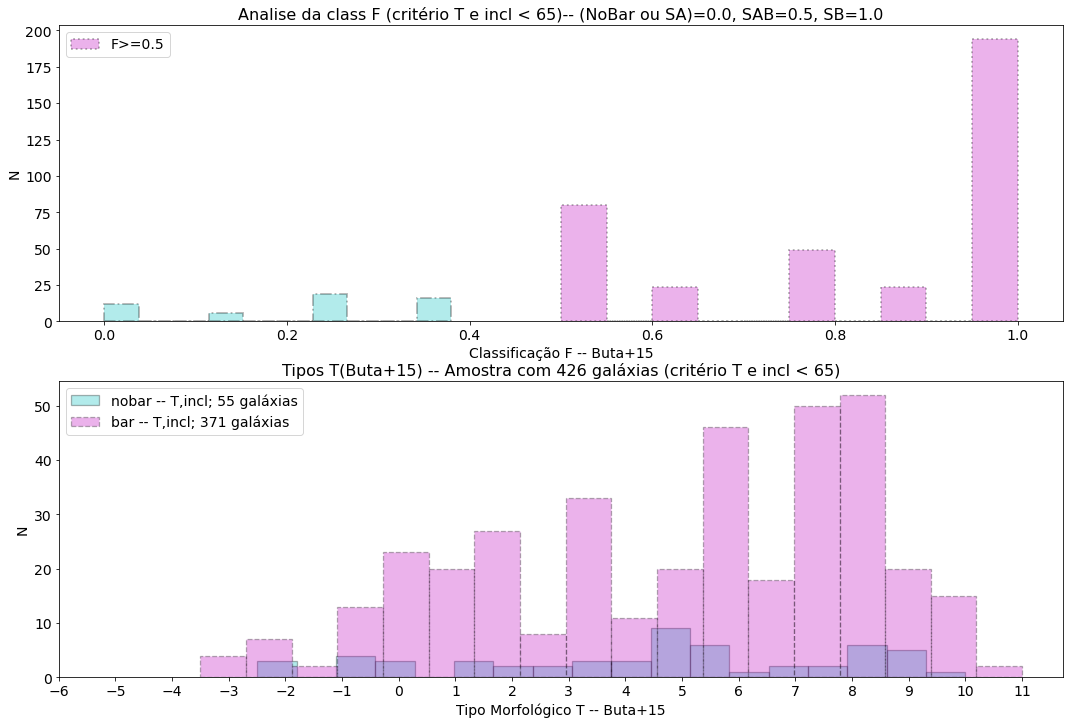

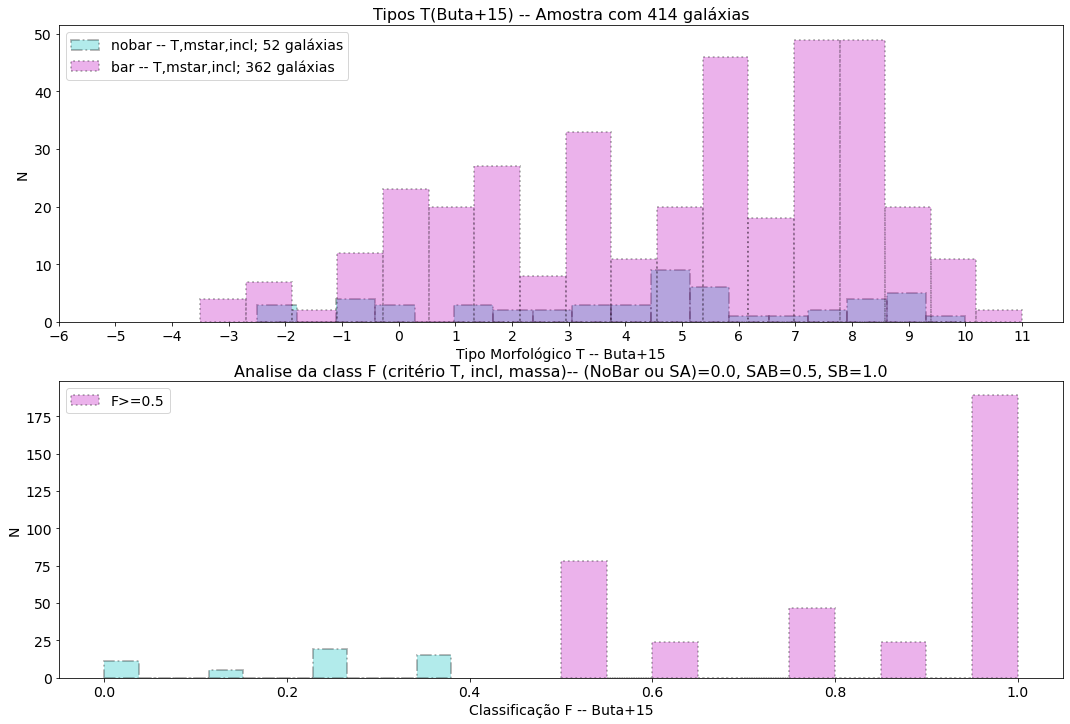

In [28]:
#massivas
bar_in_T(amostra_430, T_ini= -6, T_fin=12, mstar_ini=9, mstar_fin='No',plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]
/tmp/ipykernel_93873/3278016298.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta_mass = espirais_buta_i65[espirais_buta_i65['mstar'] >= mstar_ini][espirais_buta_i65['mstar'] < mstar_fin]
/tmp/ipykernel_93873/3278016298.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_barradas_buta_mass = espirais_barradas_buta_i65[espirais_barradas_buta_i65['mstar'] >=mstar_ini][espirais_barradas_buta_i65['mstar'] < mstar_fin]


Então temos que de um total de 430 galáxias

426 estão dentro do critério T de:  -6 -- 12

371 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.089   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  206 galáxias

Onde,  180 possuem barra, assim:  87.379  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  206 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  6.607766990291262 
Média amostra com barras: 6.670555555555556
Desvio padrão:  2.585759707725143 
Desvio padrão da amostra com barras:  2.5503310726740778
Mediana:  (7.0, '^+ ', 2.193526698016405, '_-', -2.9779927174338807) 
Mediana da amostra com barras:  (7.

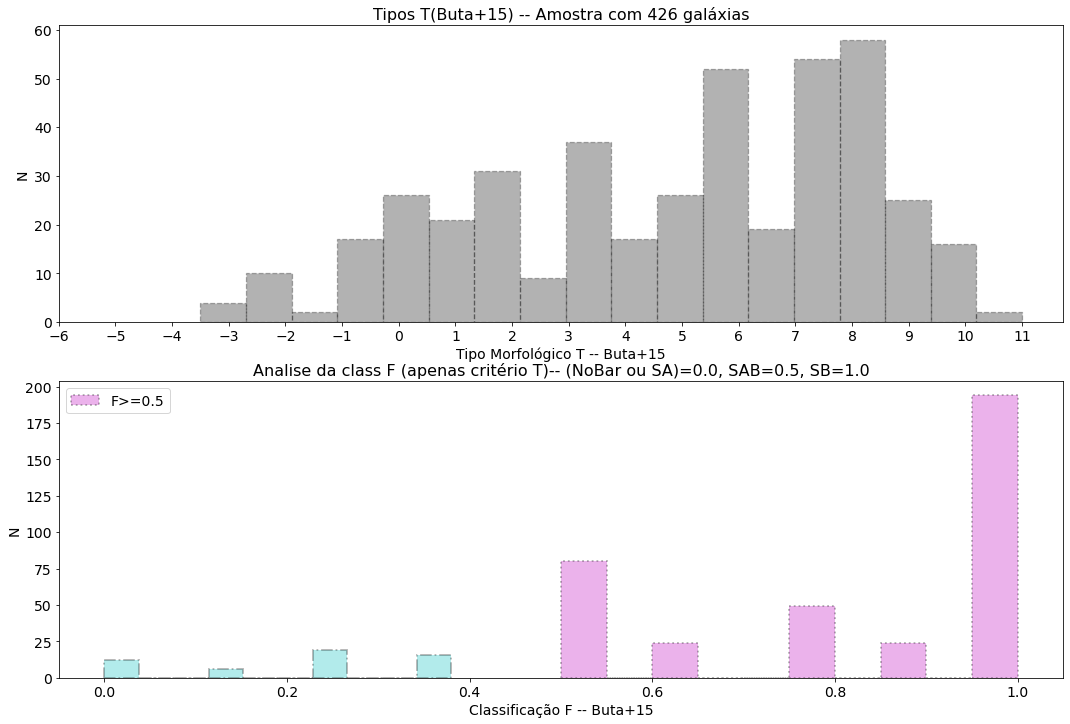

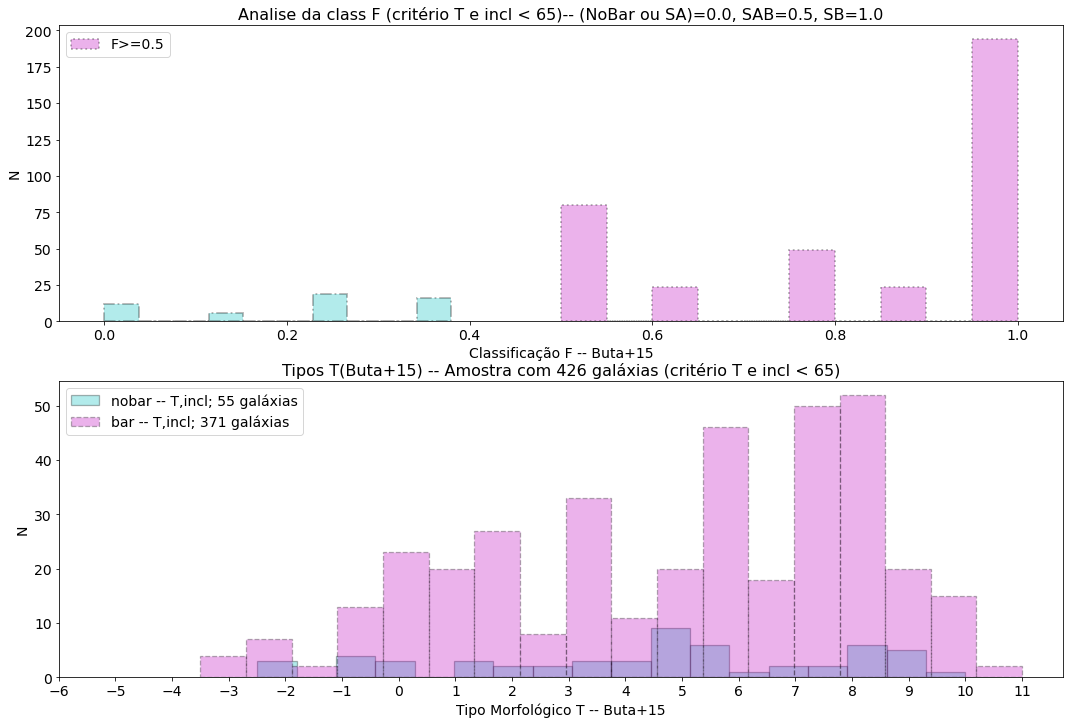

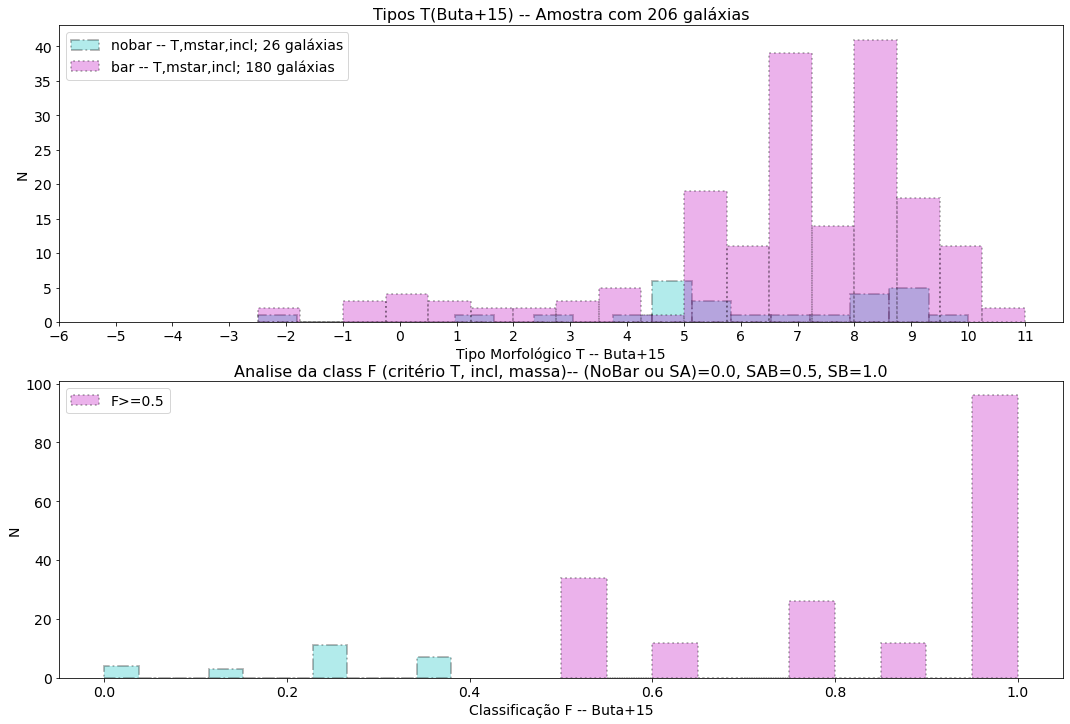

In [29]:
#massivas intermediarias
bar_in_T(amostra_430, T_ini= -6, T_fin=12, mstar_ini=9, mstar_fin=10,plot=True, saveplot=False)

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 430 galáxias

426 estão dentro do critério T de:  -6 -- 12

371 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 87.089   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  426 galáxias

Onde,  371 possuem barra, assim:  87.089  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  208 galáxias

Onde,  182 possuem barra, assim:  87.500  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  208 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  2.878846153846154 
Média amostra com barras: 2.974175824175824
Desvio padrão:  2.827497979218591 
Desvio padrão da amostra com barras:  2.831910614289867
Mediana:  (3.0, '^+ ', 2.7063441330647446, '_-', -2.948651825372437) 
Mediana da amostra com barras:  (3.0

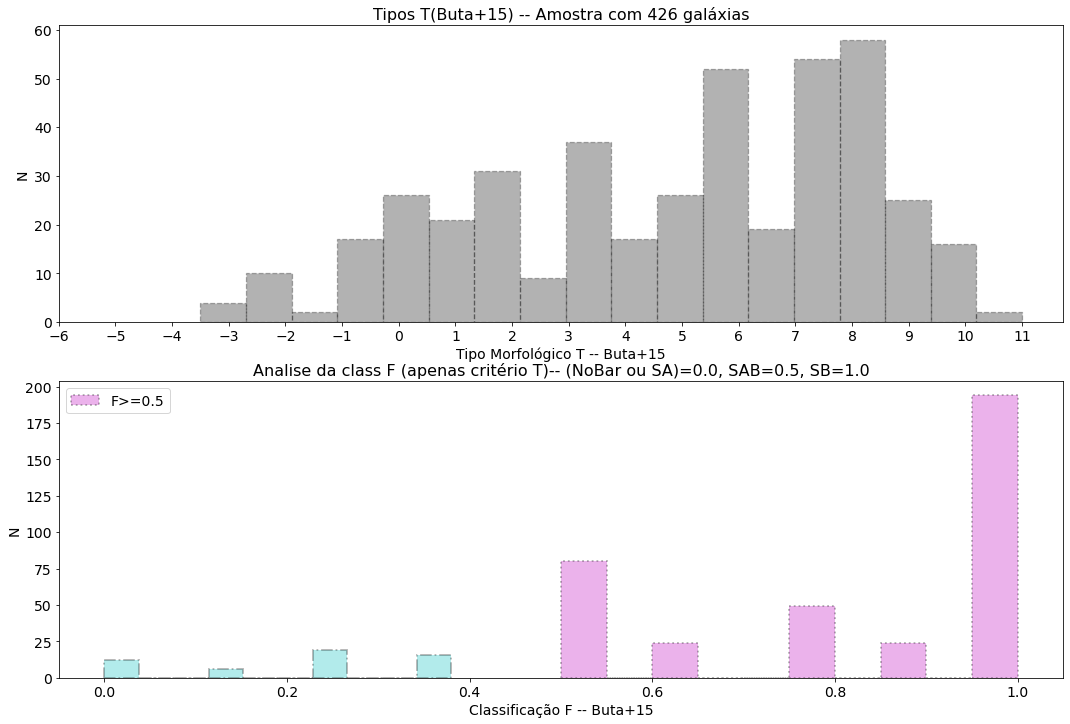

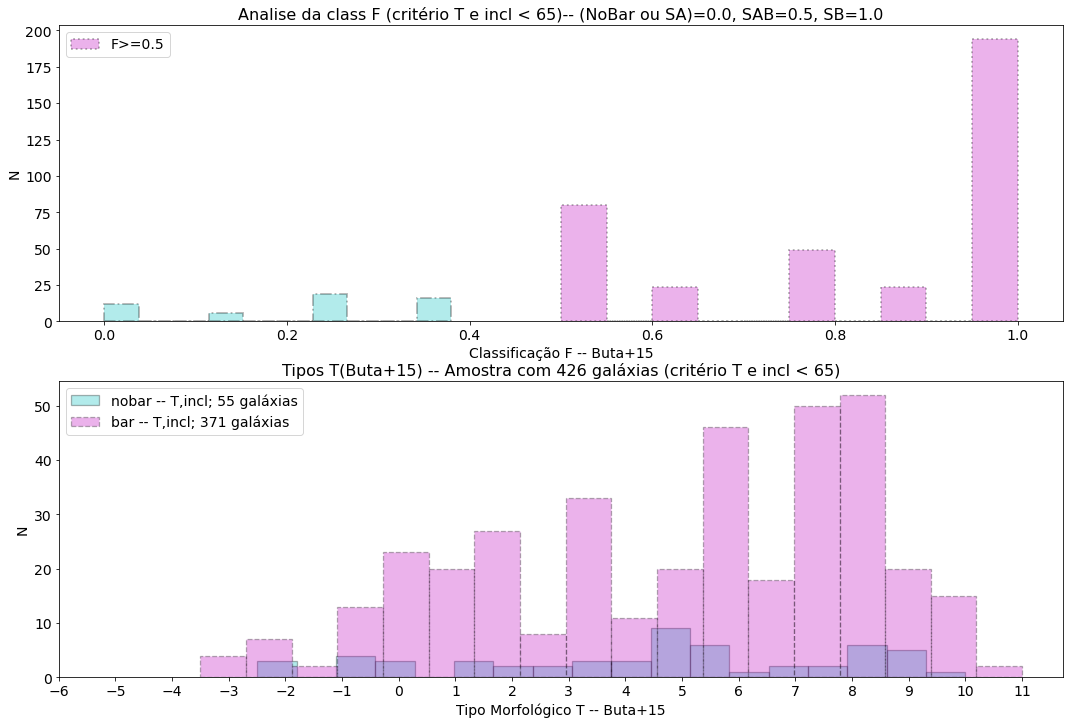

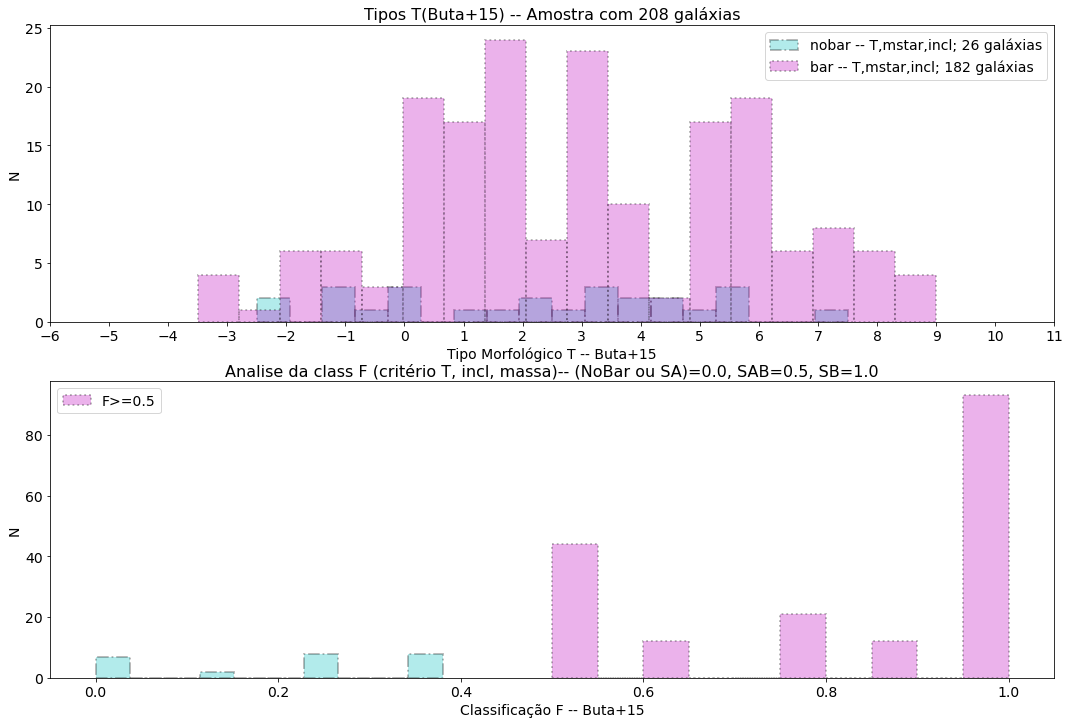

In [30]:
#muito massivas
bar_in_T(amostra_430, T_ini= -6, T_fin=12, mstar_ini=10, mstar_fin='No',plot=True, saveplot=False)

### Falsos positivos -- componente barra, tipo morfológico sem barra

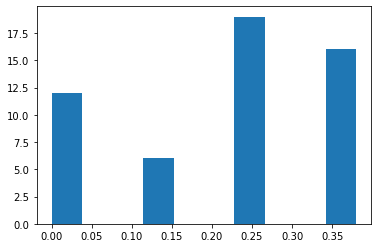

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


Então temos que de um total de 59 galáxias

55 estão dentro do critério T de:  -6 -- 12

0 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 0.000   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  55 galáxias

Onde,  0 possuem barra, assim:  0.000  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  55 galáxias

Onde,  0 possuem barra, assim:  0.000  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  55 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  4.381818181818182 
Média amostra com barras: nan
Desvio padrão:  3.384407610798832 
Desvio padrão da amostra com barras:  nan


/home/nimusagi/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nimusagi/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mediana:  (5.0, '^+ ', 2.7662257926170137, '_-', -4.0025894289806505) 
Mediana da amostra com barras:  (nan, '^+ ', nan, '_-', nan) 




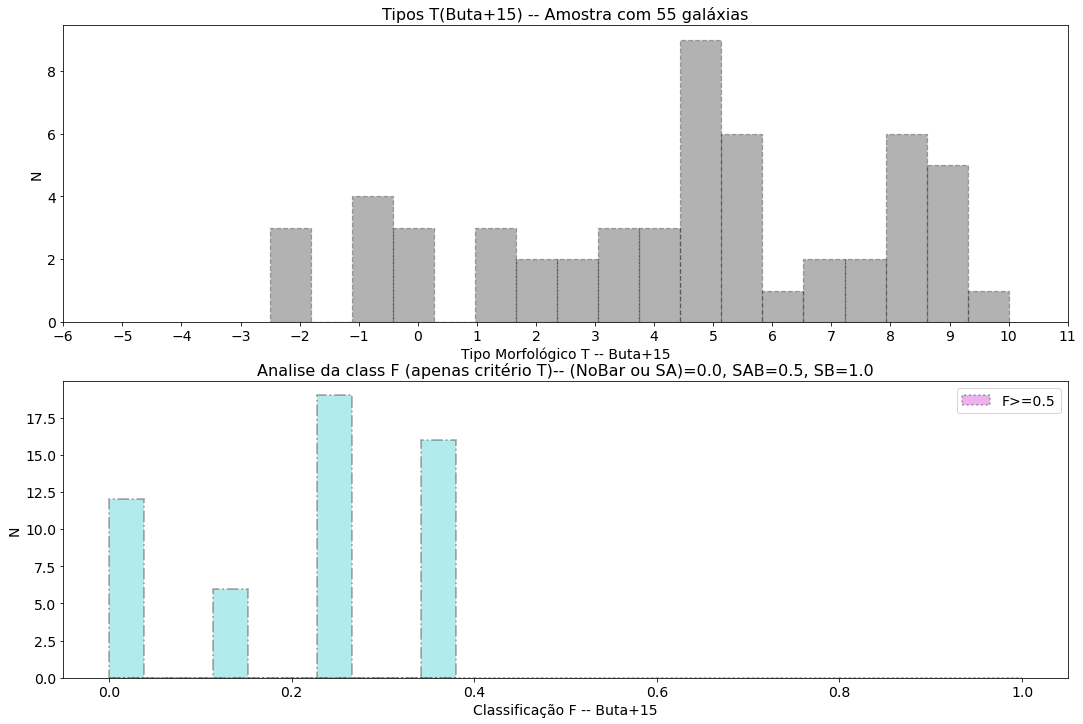

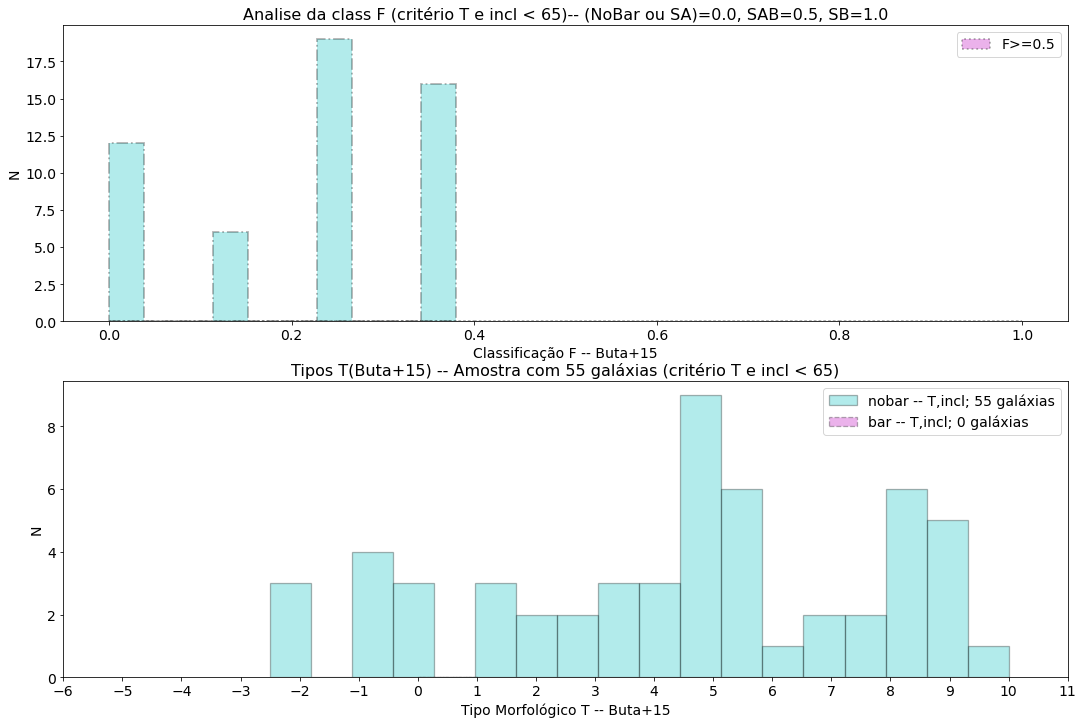

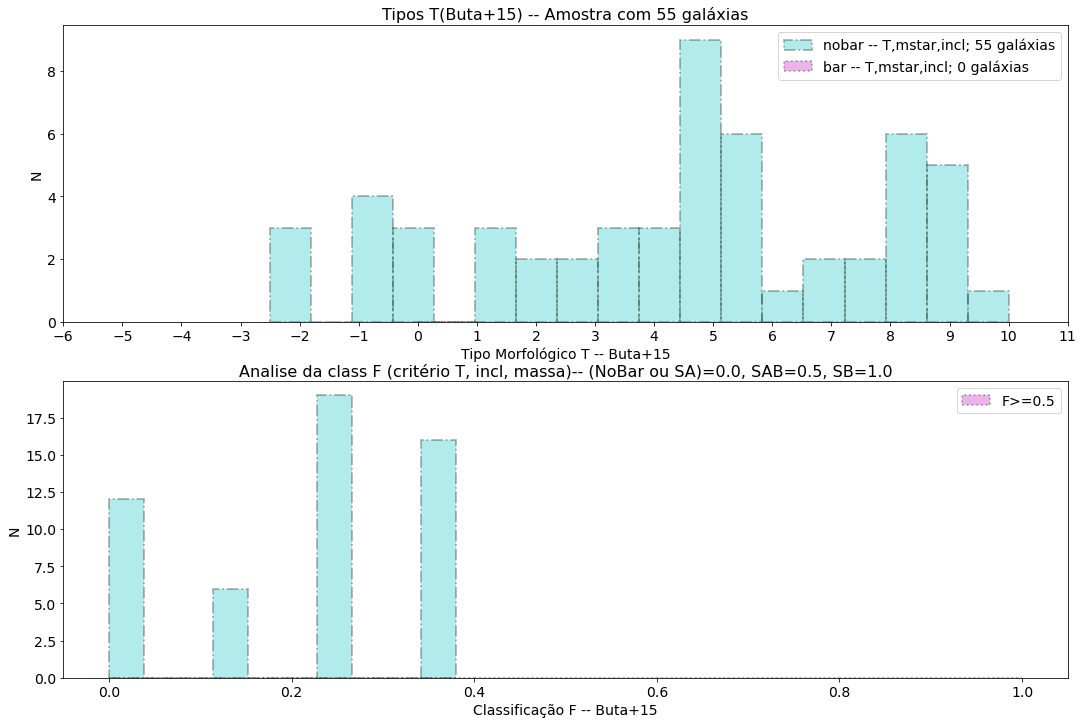

In [31]:
mask_bar_ = amostra_430['__F_'] >= 0.5

amostra_430_fp = amostra_430[~mask_bar_] #selecionando apenas parte da amostra que não possui barra, mas possui componente barra -- da nossa amostra ideal
plt.hist(amostra_430_fp['__F_'])
plt.show()


bar_in_T(amostra_430_fp, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin='No',plot=True, saveplot=True)

30     ESO576-017
140       NGC3162
145       NGC3274
147       NGC3329
161       NGC3599
248       NGC4606
263       NGC4941
307       NGC5915
364     PGC047721
374      UGC00191
376      UGC01862
377      UGC04306
Name: Name_1, dtype: object
Então temos que de um total de 12 galáxias

12 estão dentro do critério T de:  -6 -- 12

0 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 0.000   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  12 galáxias

Onde,  0 possuem barra, assim:  0.000  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  12 galáxias

Onde,  0 possuem barra, assim:  0.000  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  12 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológico e inclinação:  2.9583333333333335 
Média amos

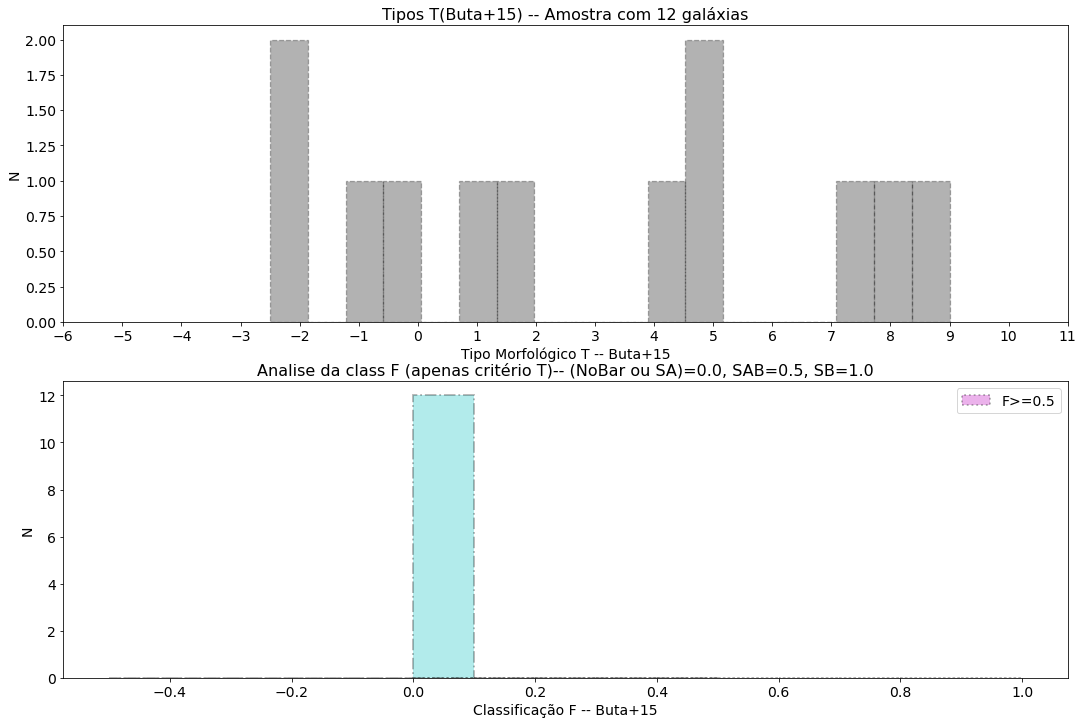

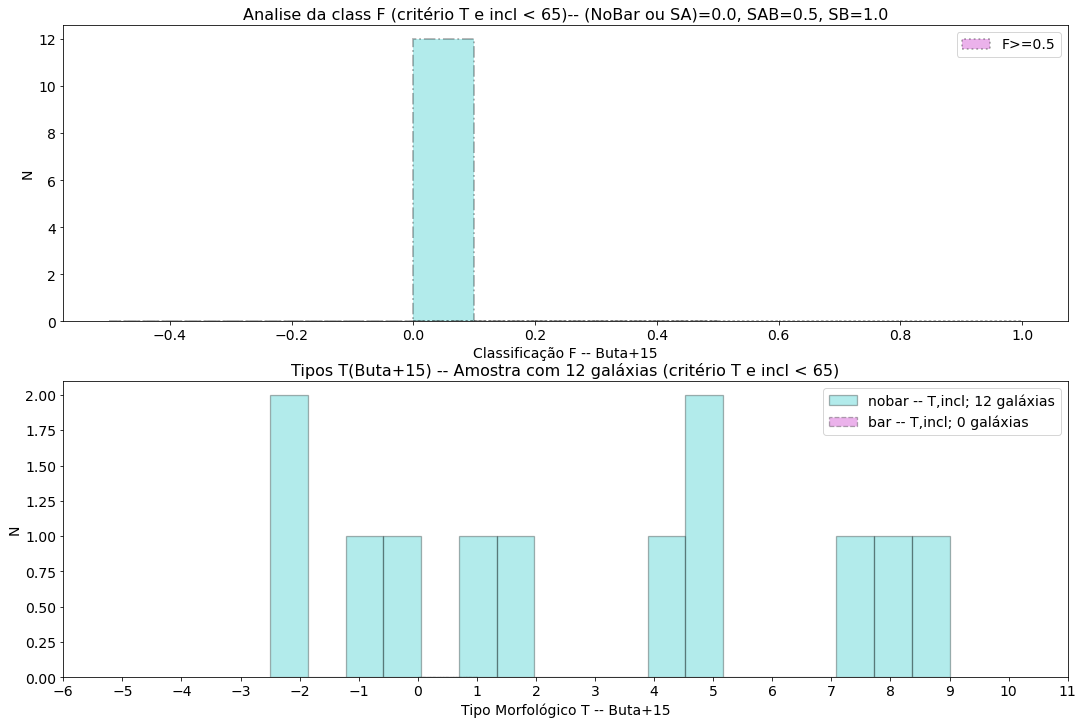

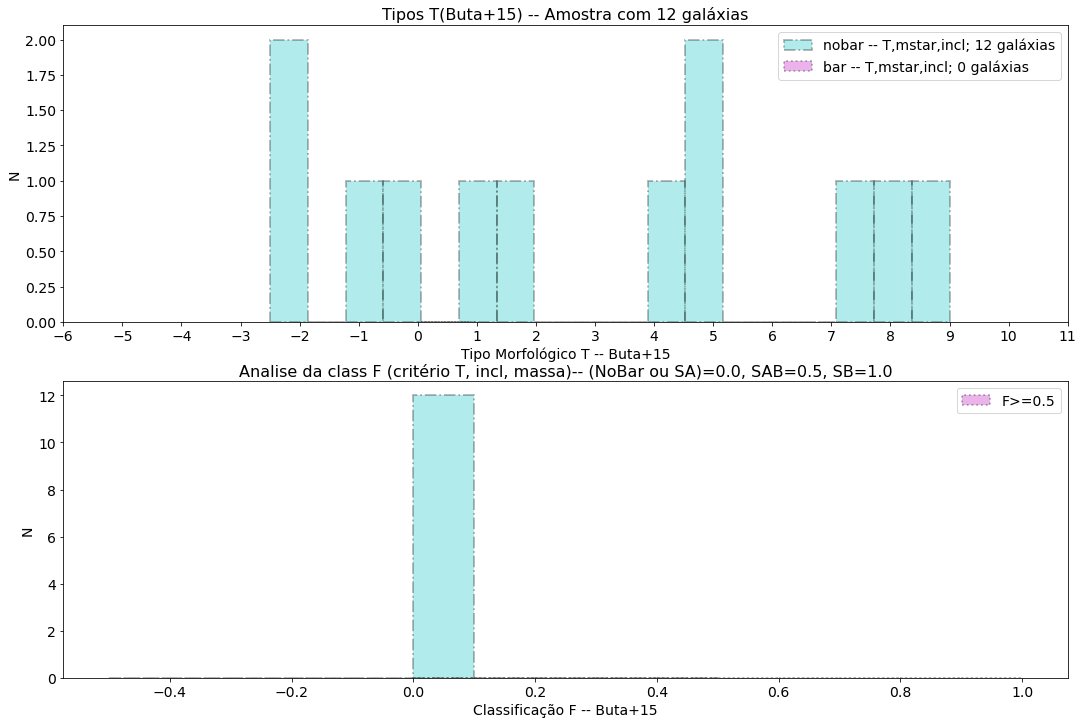

In [32]:
mask_T0 = amostra_430_fp['__F_'] < 0.1
print(amostra_430_fp[mask_T0]['Name_1'])
bar_in_T(amostra_430_fp[mask_T0], T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin='No',plot=True, saveplot=True)

### Falsos negativos -- possuem um tipo morfológico com barra, mas não possuem componente barra

In [33]:
s4g_comps_tmbar = s4g_comps[s4g_comps['__F_'] >= 0.50] #escolhendo tipo morfológico com barra 

maskbar = s4g_comps_tmbar['Mod'].str.contains('bar') #mascara para selecionar galáxias com 'bar' no modelo
s4g_compsnobar_tmbar = s4g_comps_tmbar[~maskbar] #aplicando o inverso da máscara

s4g_compsnobar_tmbar_nodup = s4g_compsnobar_tmbar.drop_duplicates(subset='Name_1') #retirando linhas duplicadas -- cada linha é uma componente

s4g_compsnobar_tmbar_nodup
#buta_barinT(tabela= s4g_barradas_noBAR , T_ini = 1, T_fin = 7, mstar_ini = 9, mstar_fin='No',plot=True)

Name_1   Mod  Nc  Q  C        Fn     f1  mag1_1     f2    mu02  ...  \
1     ESO011-005   _bz   2  4  B    sersic  0.571  14.822    NaN     NaN  ...   
17    ESO027-008   _dn   2  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
24    ESO079-003   _bz   2  4  B    sersic  0.264  12.036    NaN     NaN  ...   
34    ESO085-047   _dd   2  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
36    ESO107-016    _z   1  4  Z  edgedisk    NaN     NaN  1.000  21.793  ...   
...          ...   ...  .. .. ..       ...    ...     ...    ...     ...  ...   
4598    UGC12307    _d   1  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
4602    UGC12313    _d   1  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
4612    UGC12682    _d   1  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
4621    UGC12791    _d   1  5  D   expdisk    NaN     NaN    NaN     NaN  ...   
4625    UGC12857  _zzn   3  4  Z  edgedisk    NaN     NaN  0.382  21.326  ...   

      f5  mag5   mstar   dmean  type  t_1   incl  Dist  __T_  __F_  
1    NaN   NaN   9.749  51.680   SBc  5.9  83.91   NaN   7.5  0.50  
17   NaN   NaN  10.410  31.000   SBc  5.1  73.69  31.0   3.5  0.62  
24   NaN   NaN  10.595  38.950   SBb  3.1  90.00  39.0   0.5  0.75  
34   NaN   NaN   8.520  16.700   SBm  9.0  78.10  16.7   9.0  1.00  
36   NaN   NaN   8.833  28.580  SBcd  7.4  90.00   NaN   8.0  0.75  
...   ..   ...     ...     ...   ...  ...    ...   ...   ...   ...  
4598 NaN   NaN   9.325     NaN     I  9.8  90.00   NaN   3.5  0.50  
4602 NaN   NaN   8.975     NaN     I  9.8  90.00   NaN   8.5  0.50  
4612 NaN   NaN   8.965  20.000     I  9.8  48.70  20.0   9.0  0.75  
4621 NaN   NaN   8.190  12.900     I  9.9  90.00  12.9  10.0  1.00  
4625 NaN   NaN  10.005  36.717   Sbc  4.0  90.00  36.7   3.0  1.00  

[470 rows x 24 columns]

Modelos de decomposição presentes na amostra: 
_d      156
_zz      60
_dd      51
_z       51
_bd      51
_dn      37
_bz      20
_zn      11
_bdd     11
_zzn      9
_nd       4
_ddn      3
_bzz      2
_nbd      1
_ndd      1
_b        1
_dz       1
Name: Mod, dtype: int64
Então temos que de um total de 470 galáxias

469 estão dentro do critério T de:  -6 -- 12

469 possuem barras considerando o critério de T e F>=0.50

Com isso, vemos que considerando os critérios de Buta15, 100.000   das galáxias entre os T escolhidos são barradas

Olhando para i<65, temos:  108 galáxias

Onde,  108 possuem barra, assim:  100.000  % das galaxias acima são barradas

Olhando para o corte de massa e considerando i<65, temos:  107 galáxias

Onde,  107 possuem barra, assim:  100.000  % das galaxias da amostra acima são barradas


Informações estatísticas da coluna de tipo morfológico da amostra com  107 galáxias, critério de massa, inclinação e tipo T:

Média da amostra com corte de massa, tipo morfológi

/tmp/ipykernel_93873/3278016298.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amostra_buta = tabela[tabela['__T_'] >= T_ini][tabela['__T_'] <=T_fin]


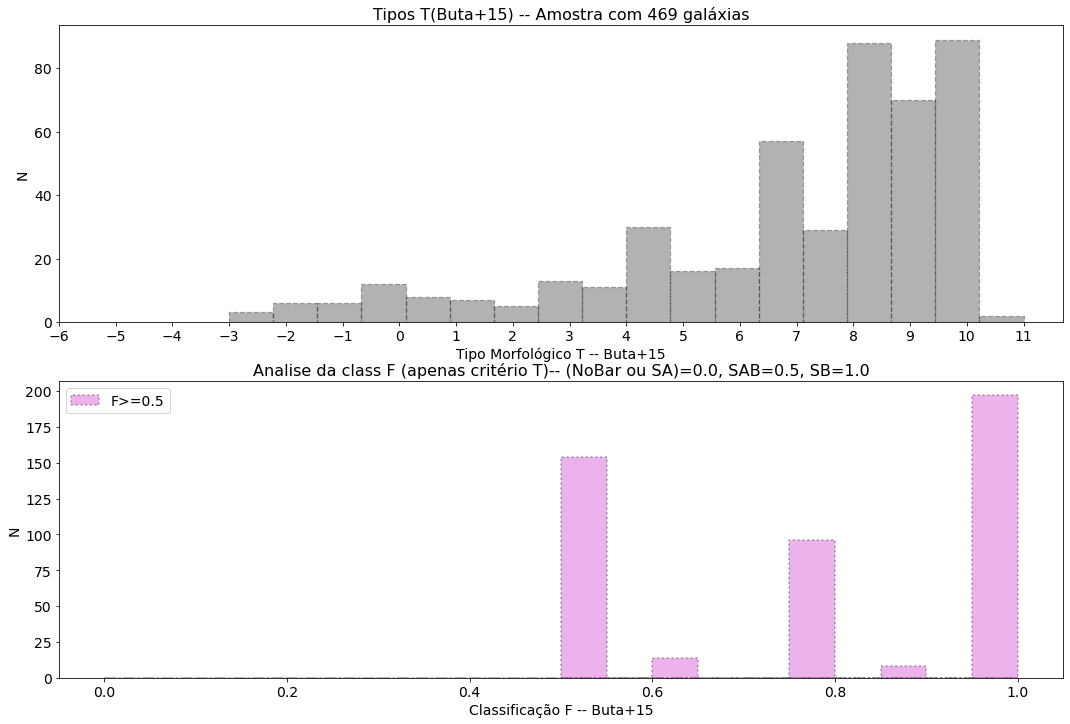

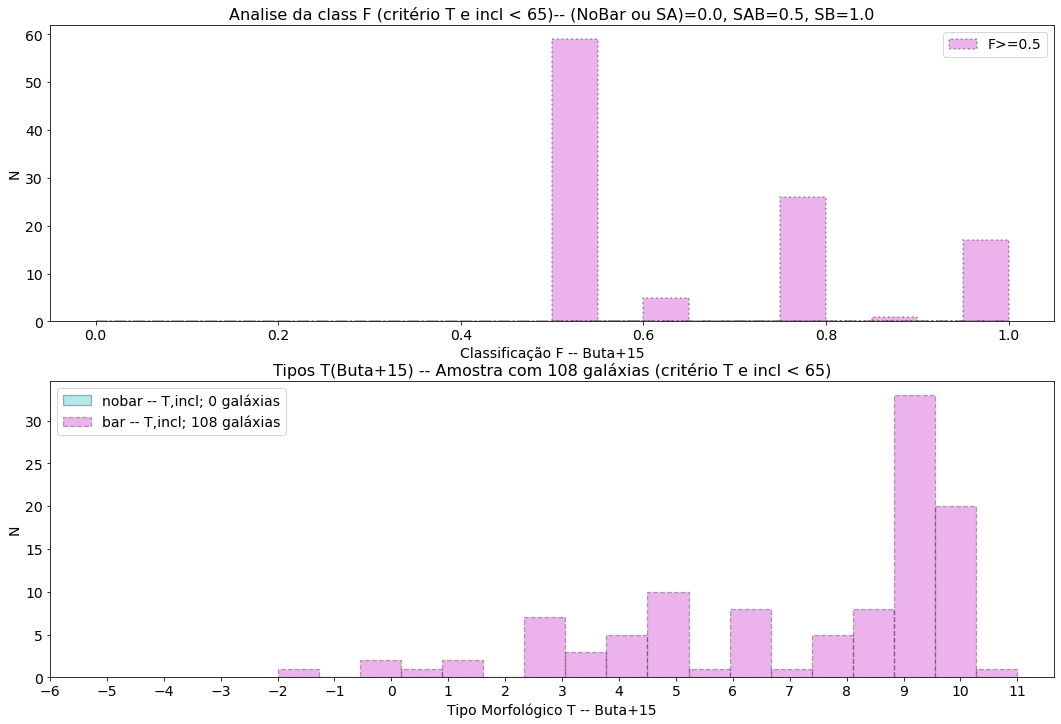

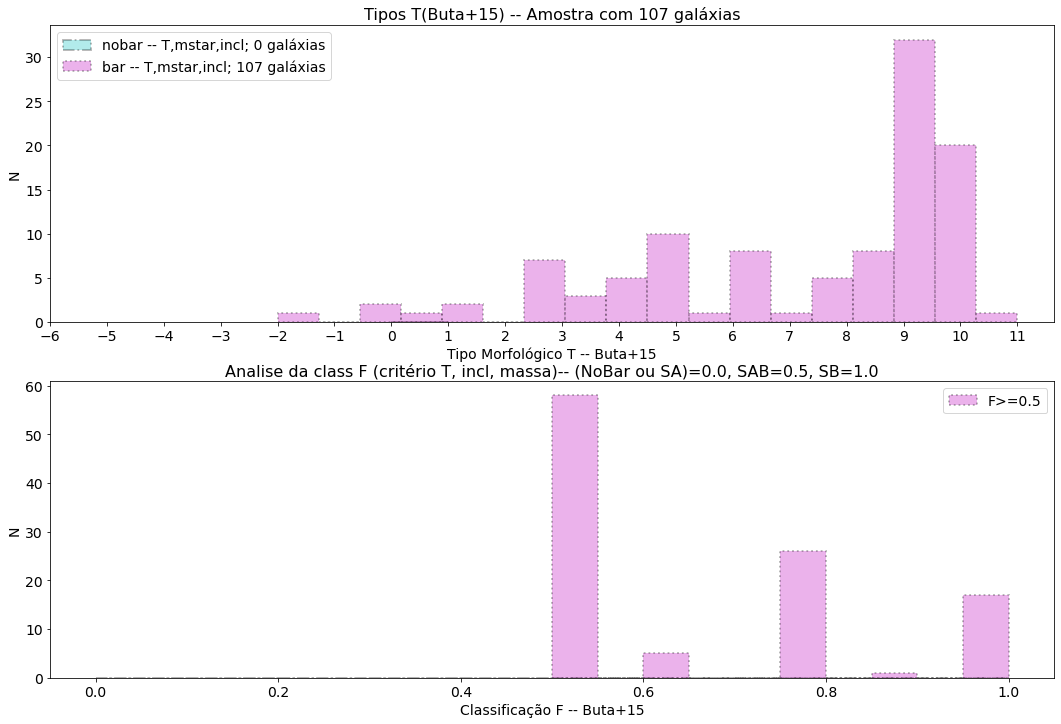

In [34]:
print('Modelos de decomposição presentes na amostra: ')
print(s4g_compsnobar_tmbar_nodup['Mod'].value_counts())

bar_in_T(s4g_compsnobar_tmbar_nodup, T_ini= -6, T_fin=12, mstar_ini=5, mstar_fin='No',plot=True, saveplot=True)